In [445]:
from networkx.generators.random_graphs import erdos_renyi_graph, dense_gnm_random_graph
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [143]:
%load_ext autoreload
%autoreload 2

In [151]:
import numpy as np
import custom_funcs as ca
from tqdm.notebook import tqdm

# Knapsack

In [1036]:
candidates = {
    'mimic': mlrose.mimic, 'sa': mlrose.simulated_annealing,
    'rhc': mlrose.random_hill_climb, 'ga': mlrose.genetic_alg
}

base_kwargs = {
    'mimic': dict(curve=True, fast_mimic=True), 'sa': dict(curve=True),
    'rhc': dict(curve=True, restarts=100), 'ga': dict(curve=True)
}

## Lots of things - small backpack - SIMULATED ANNEALING

In [1037]:
np.random.seed(14)
par_spaces = {
    "mimic": {"par_name": "pop_size",
              "range": np.arange(10, 520, 50).tolist()},
    "sa": {"par_name": "schedule",
           "range": [mlrose.GeomDecay(init_temp=10, decay=x, min_temp=1)
           for x in [0.999, 0.99, 0.95, 0.90, 0.8]]},
    "rhc": {"par_name": "restarts",
            "range": np.arange(0, 500, 50).tolist()},
    "ga": {"par_name": "pop_size",
           "range": np.arange(10, 520, 50).tolist()},
}

In [1038]:
np.random.seed(14)
weights = np.random.randint(1, 10, size=10)
values = np.random.randint(1, 10, size=10)
max_weight_pct = 0.6
fitness = mlrose.Knapsack(weights, values, max_weight_pct)
problem = mlrose.DiscreteOpt(length=10, fitness_fn=fitness, maximize=True, max_val=8)

ks_res = ca.massive_search_par(problem, candidates, par_spaces, alg_pars=base_kwargs)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

In [1035]:
print(f'Weights: {weights.tolist()}')
print(f'Values: {values.tolist()}')

Weights: [9, 7, 8, 7, 1, 9, 8, 7, 1, 8]
Values: [5, 1, 7, 5, 6, 6, 9, 6, 9, 8]


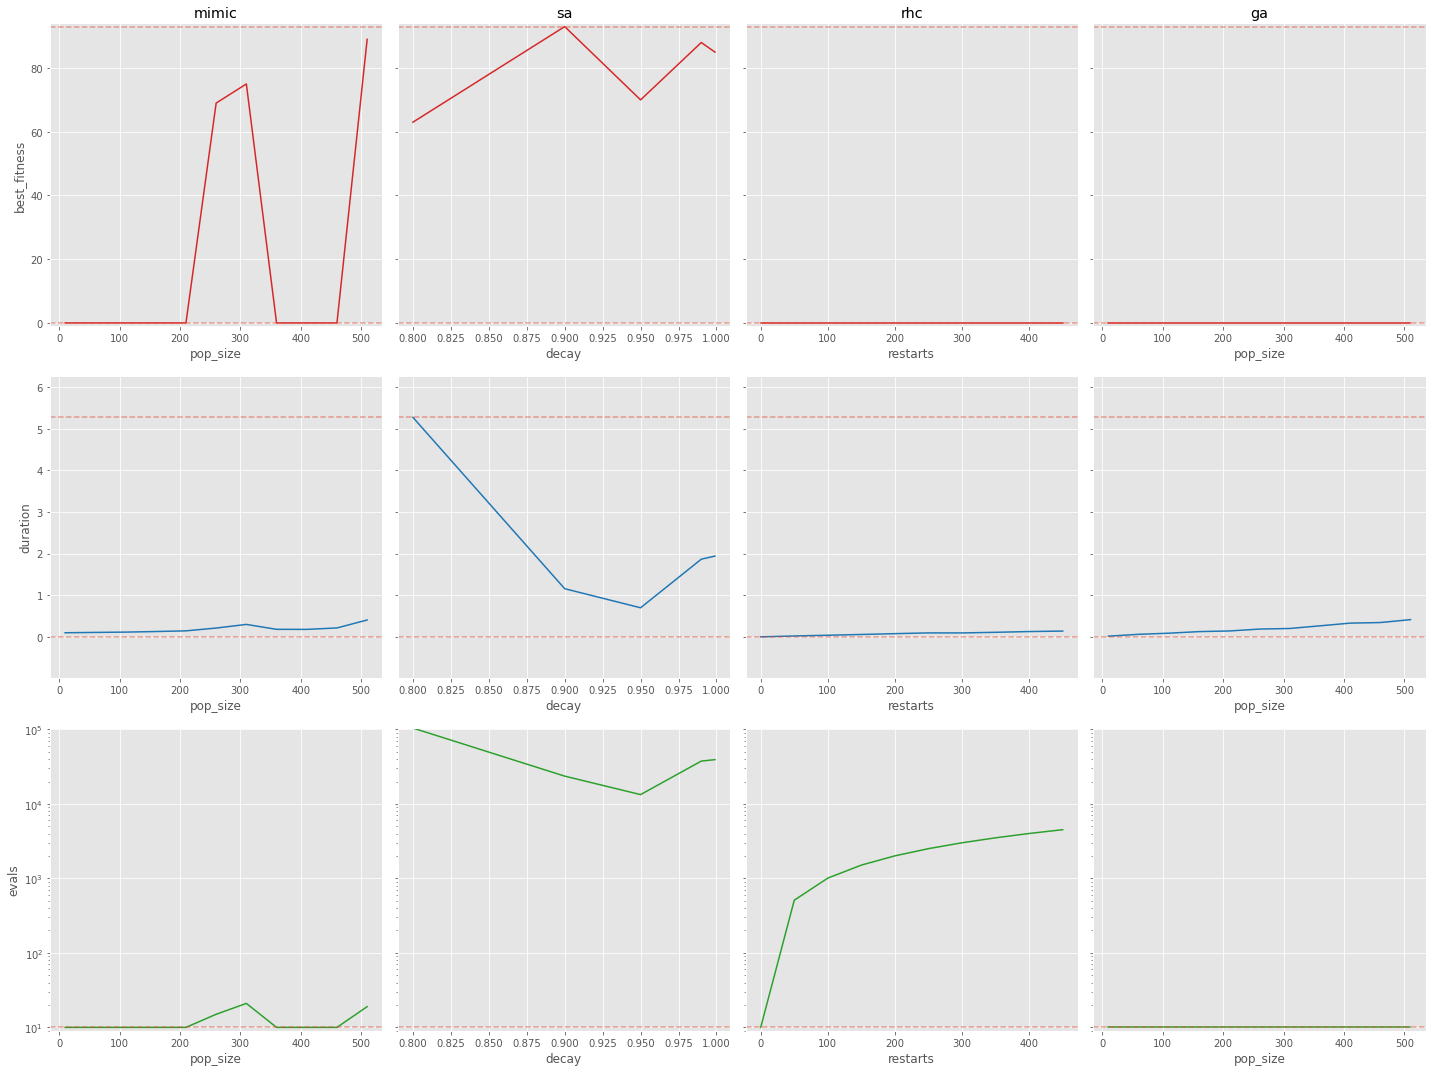

In [1039]:
fig, axes, pds = ca.single_problem_plot(ks_res)

## Big backpack - GA

In [1118]:
np.random.seed(14)

weights = np.random.randint(1, 10, size=10)
values = np.random.randint(1, 10, size=10)
max_weight_pct = 10
fitness = mlrose.Knapsack(weights, values, max_weight_pct)
problem = mlrose.DiscreteOpt(length=10, fitness_fn=fitness, maximize=True, max_val=40)

In [1119]:
print(f'Weights: {weights.tolist()}')
print(f'Values: {values.tolist()}')

Weights: [9, 7, 8, 7, 1, 9, 8, 7, 1, 8]
Values: [5, 1, 7, 5, 6, 6, 9, 6, 9, 8]


In [ ]:
small_ks_res = ca.massive_search_par(problem, candidates, par_spaces, alg_pars=base_kwargs)

In [1120]:
small_ks_res = ca.massive_search_par(problem, candidates, par_spaces, alg_pars=base_kwargs)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

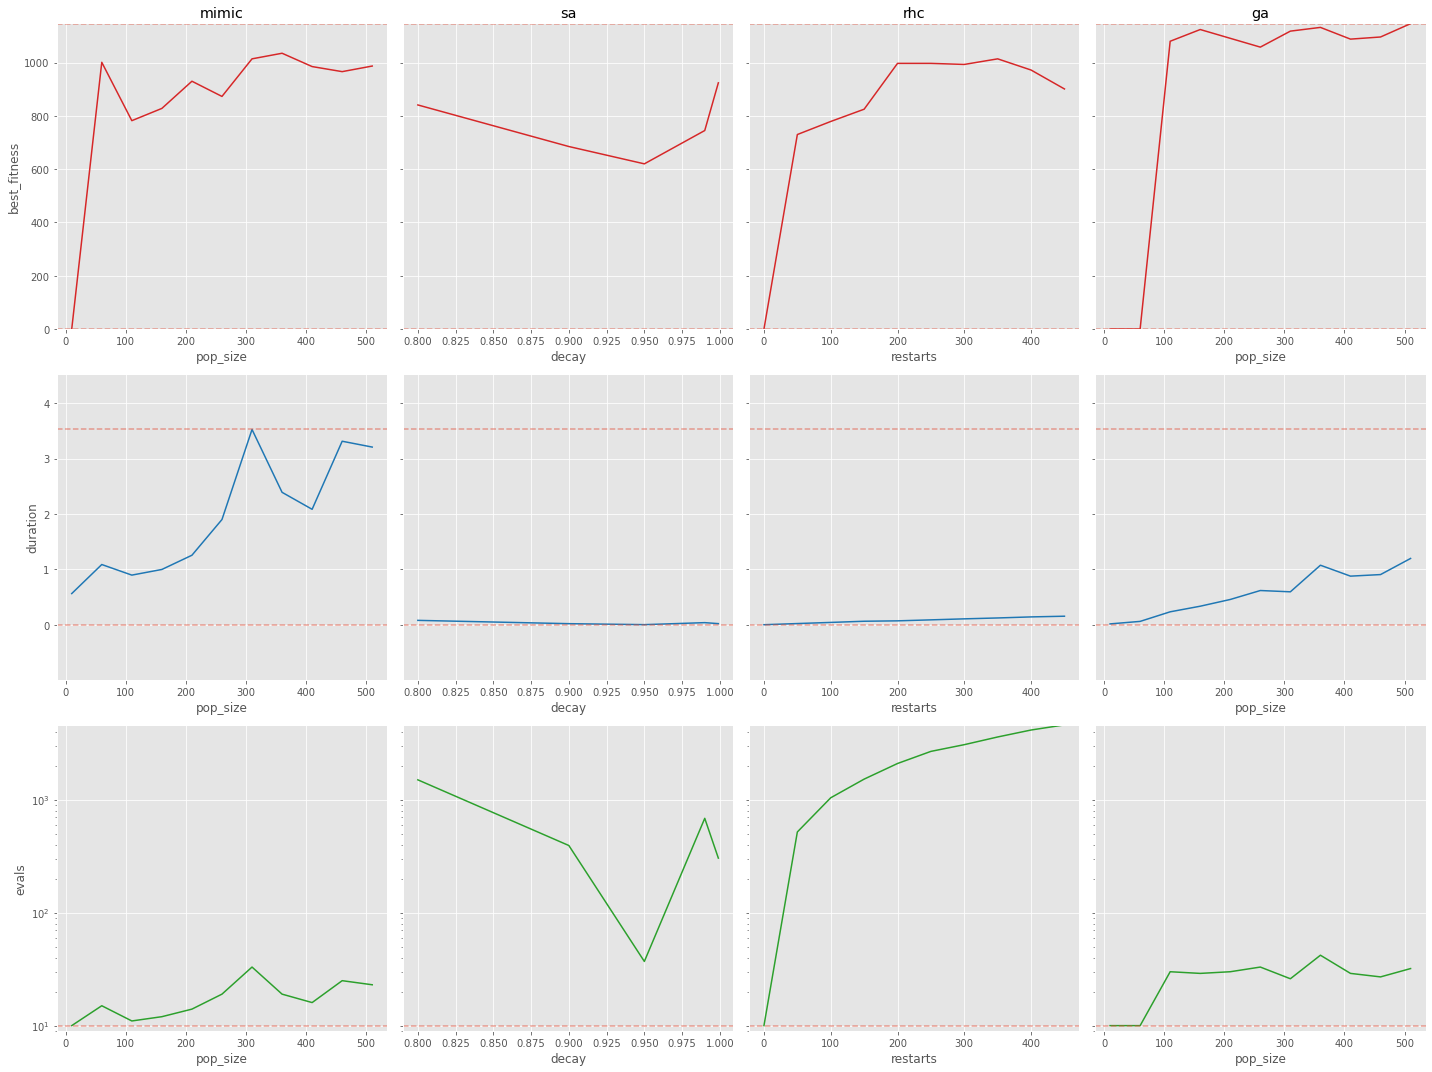

In [886]:
fig, axes, pds = ca.single_problem_plot(small_ks_res)

## Wide variety

In [887]:
np.random.seed(14)
par_spaces = {
    "mimic": {"par_name": "pop_size",
              "range": np.arange(10, 520, 50).tolist()},
    "sa": {"par_name": "schedule",
           "range": [mlrose.GeomDecay(init_temp=10, decay=x, min_temp=1)
           for x in [0.999, 0.99, 0.95, 0.90, 0.8]]},
    "rhc": {"par_name": "restarts",
            "range": np.arange(0, 500, 50).tolist()},
    "ga": {"par_name": "pop_size",
           "range": np.arange(10, 520, 50).tolist()},
}

weights = np.random.randint(1, 15, size=20)
values = np.random.randint(1, 15, size=20)
max_weight_pct = 10
fitness = mlrose.Knapsack(weights, values, max_weight_pct)
problem = mlrose.DiscreteOpt(length=20, fitness_fn=fitness, maximize=True, max_val=40)

wv_ks_res = ca.massive_search_par(problem, candidates, par_spaces, alg_pars=base_kwargs)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

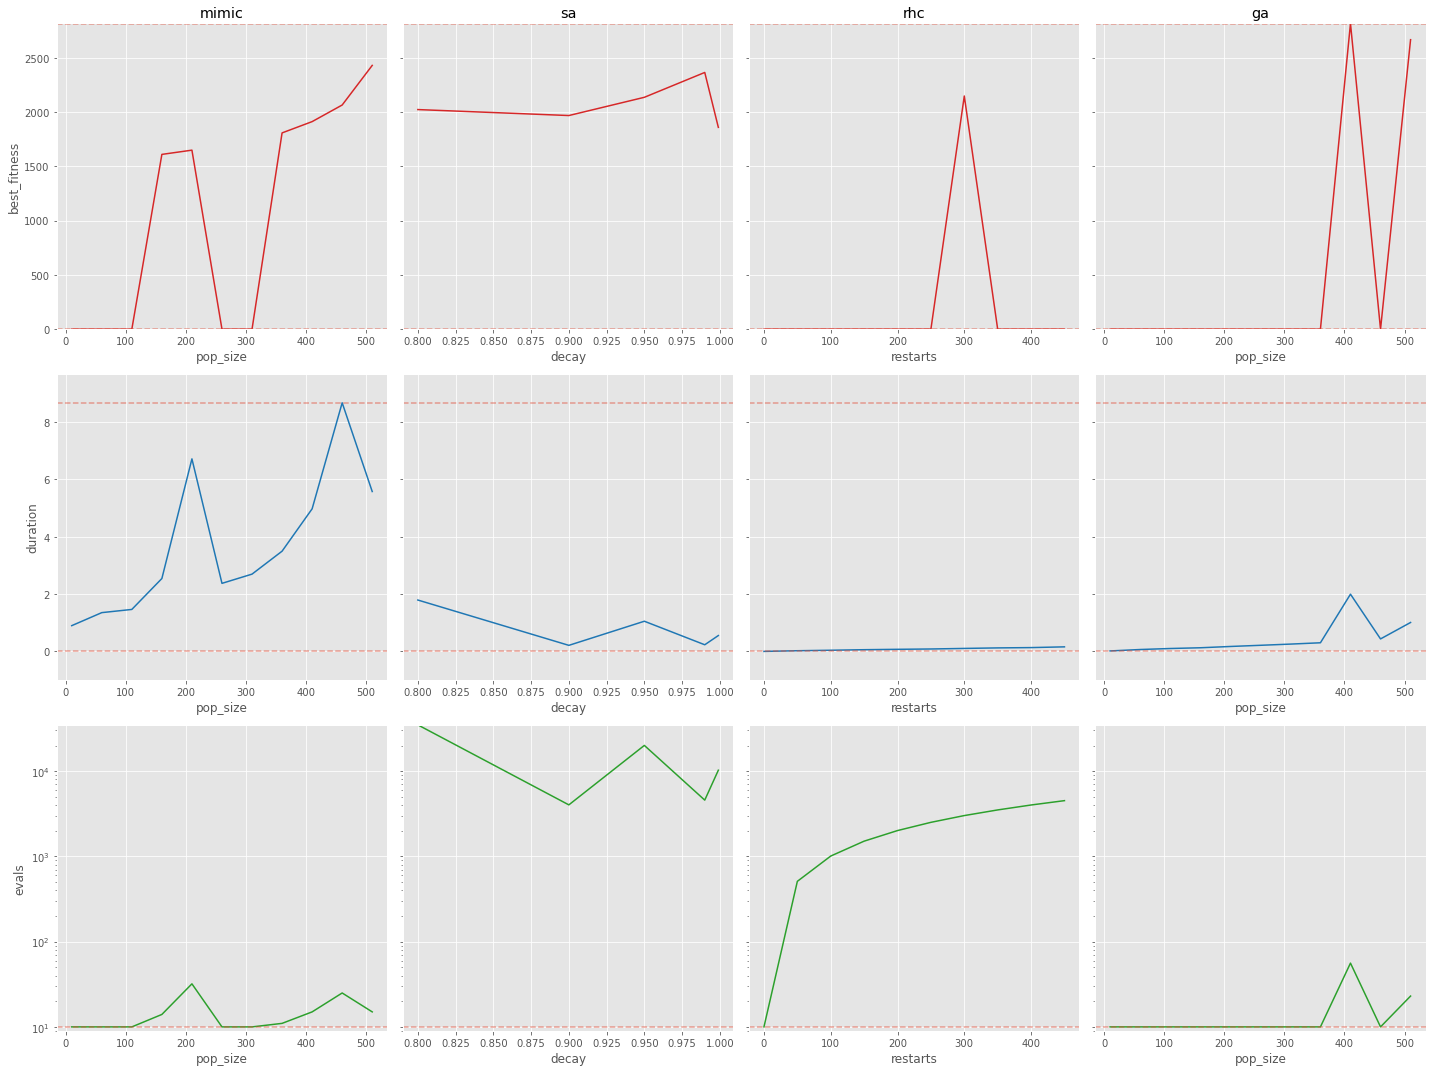

In [888]:
fig, axes, pds = ca.single_problem_plot(wv_ks_res)

# SixPeaks

## 20

In [889]:
fitness = mlrose.SixPeaks(t_pct=0.1)

problem = mlrose.DiscreteOpt(length=20, fitness_fn=fitness, maximize=True, max_val=2)
six_peaks20_res = ca.massive_search_par(problem, candidates, par_spaces, alg_pars=base_kwargs)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

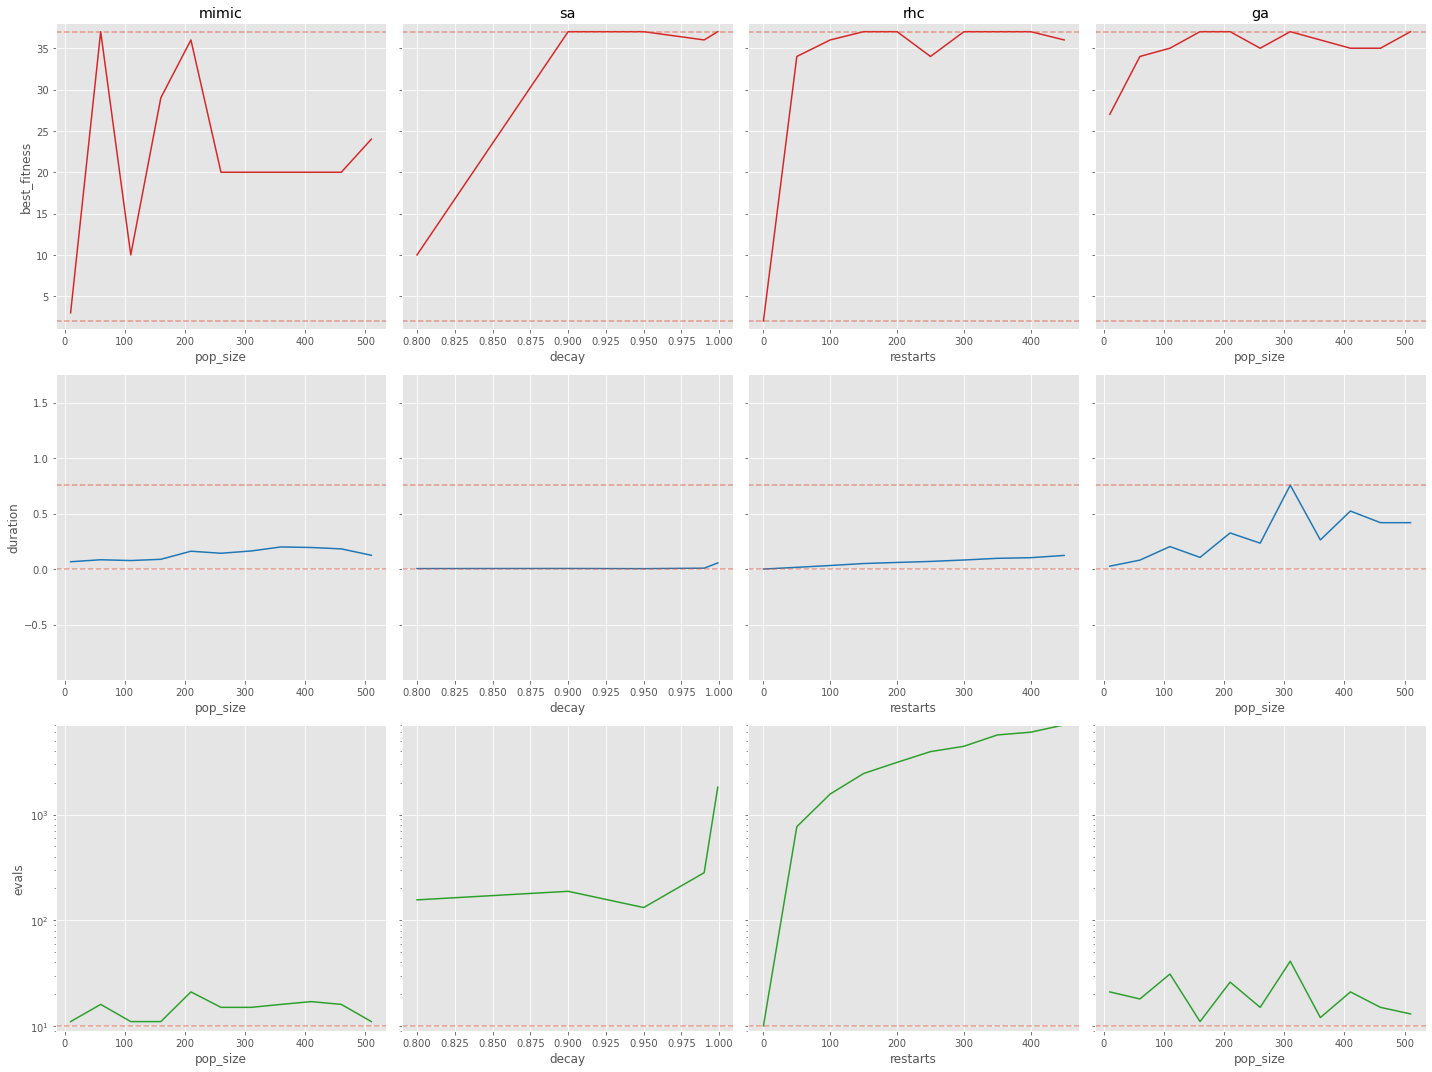

In [890]:
fig, axes, pds = ca.single_problem_plot(six_peaks20_res)

## 40

In [891]:
problem = mlrose.DiscreteOpt(length=40, fitness_fn=fitness, maximize=True, max_val=2)
six_peaks40_res = ca.massive_search_par(problem, candidates, par_spaces, alg_pars=base_kwargs)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

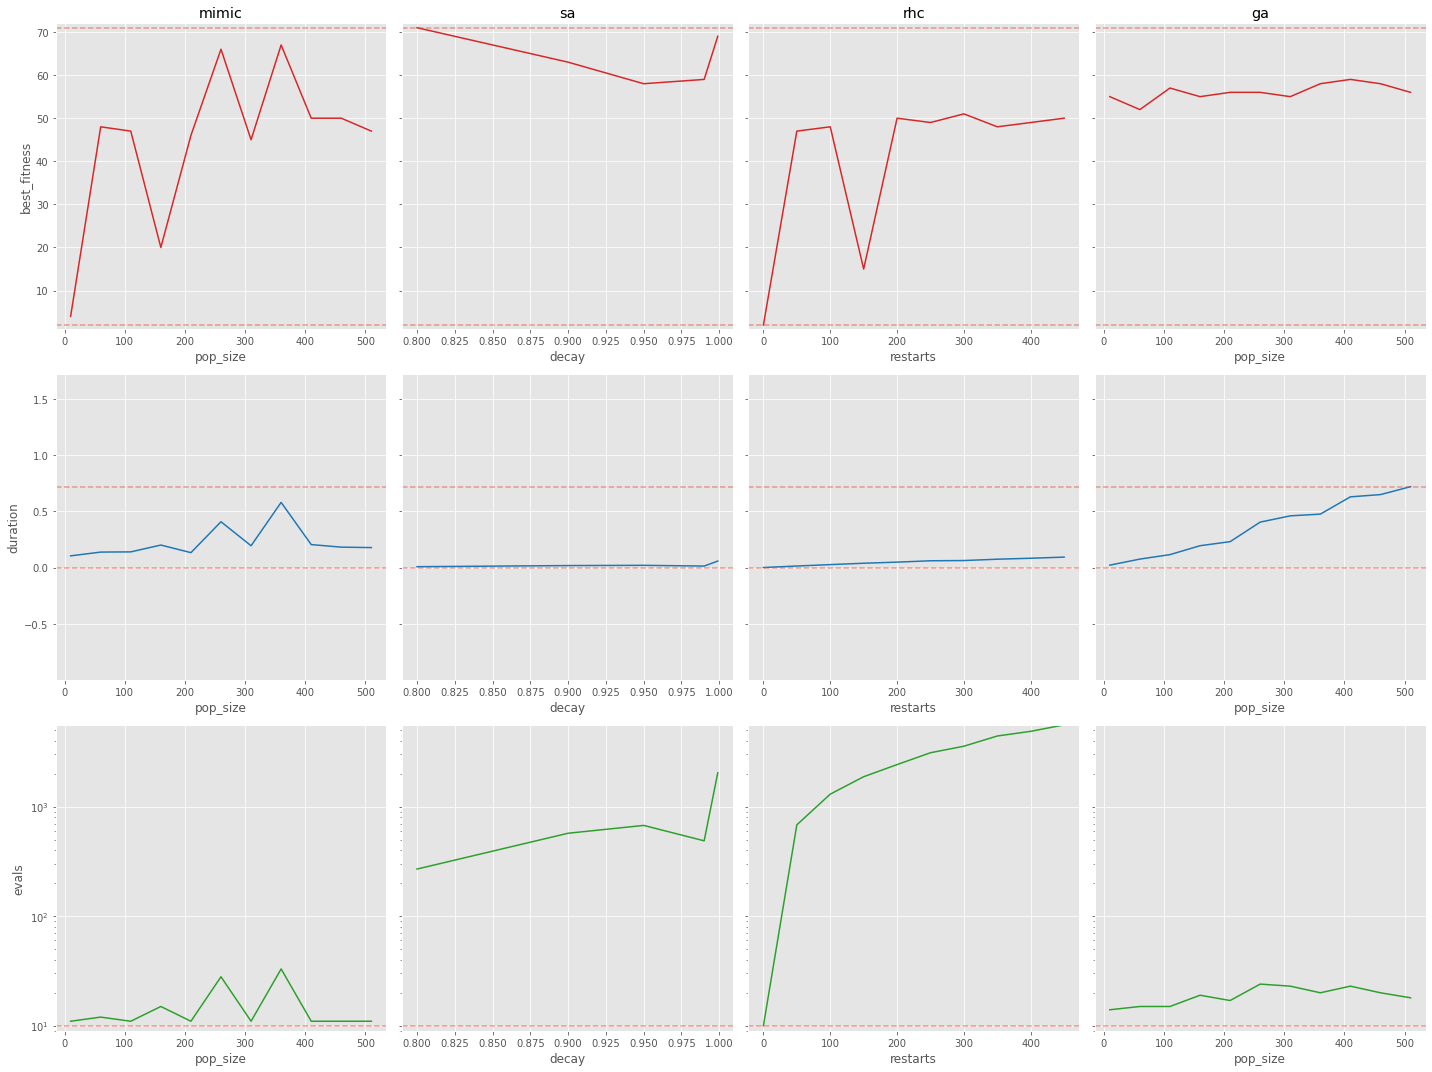

In [892]:
fig, axes, pds = ca.single_problem_plot(six_peaks40_res)

## 60

In [893]:
problem = mlrose.DiscreteOpt(length=60, fitness_fn=fitness, maximize=True, max_val=2)
six_peaks60_res = ca.massive_search_par(problem, candidates, par_spaces, alg_pars=base_kwargs)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

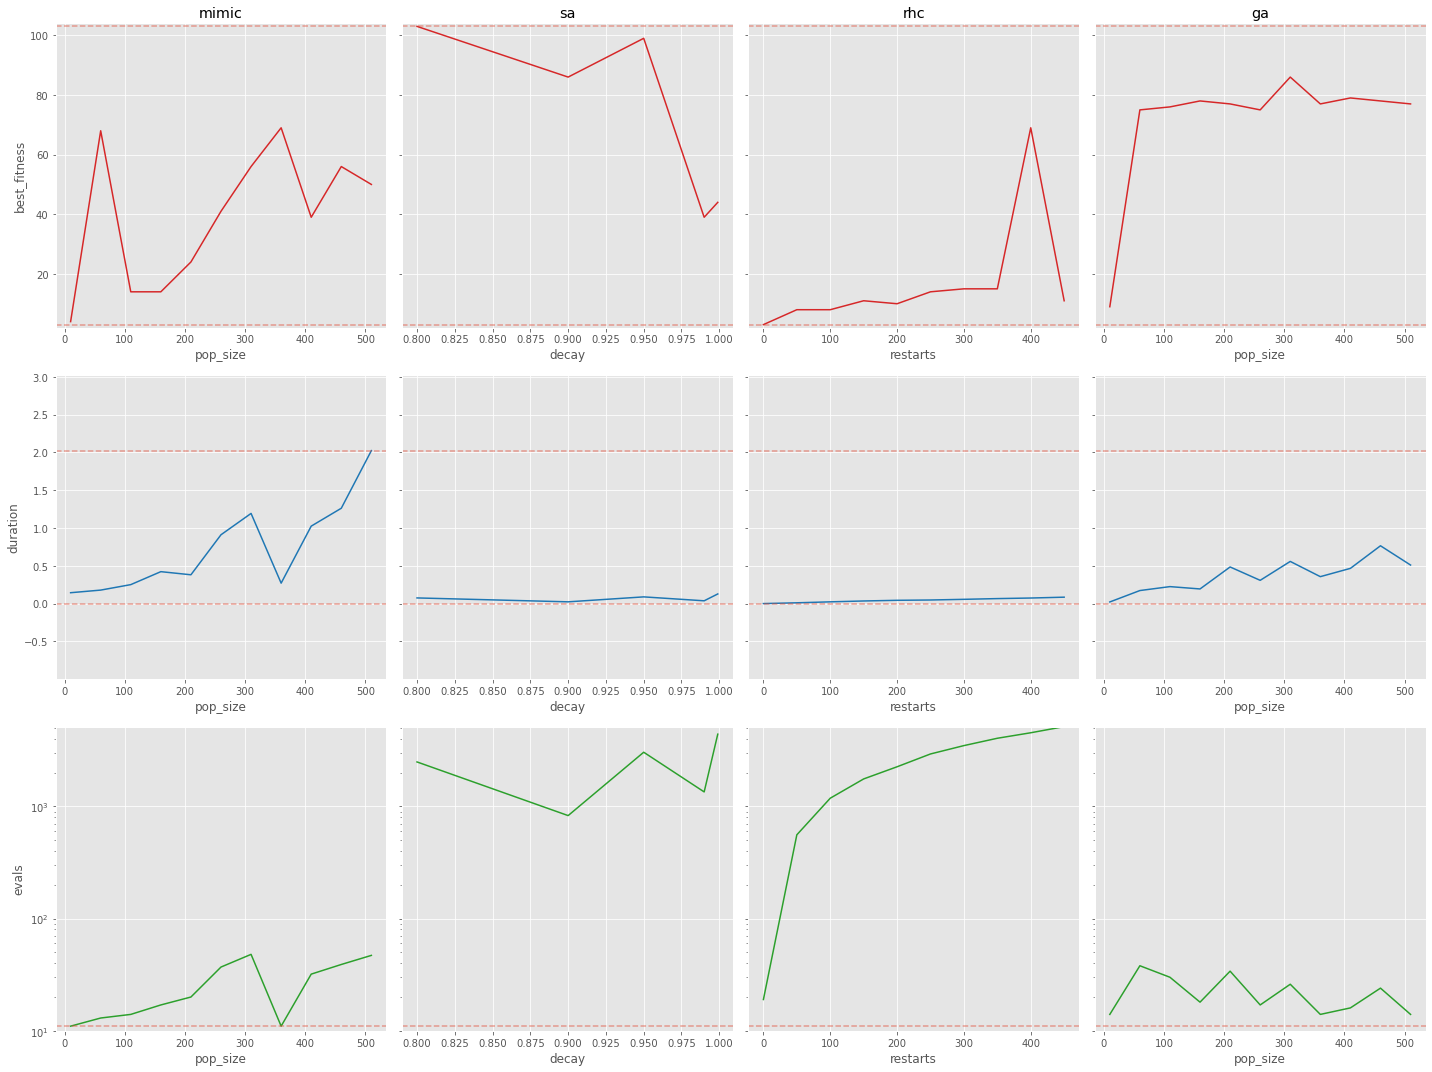

In [894]:
fig, axes, pds = ca.single_problem_plot(six_peaks60_res)

## 100

In [895]:
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)
six_peaks100_res = ca.massive_search_par(problem, candidates, par_spaces, alg_pars=base_kwargs)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

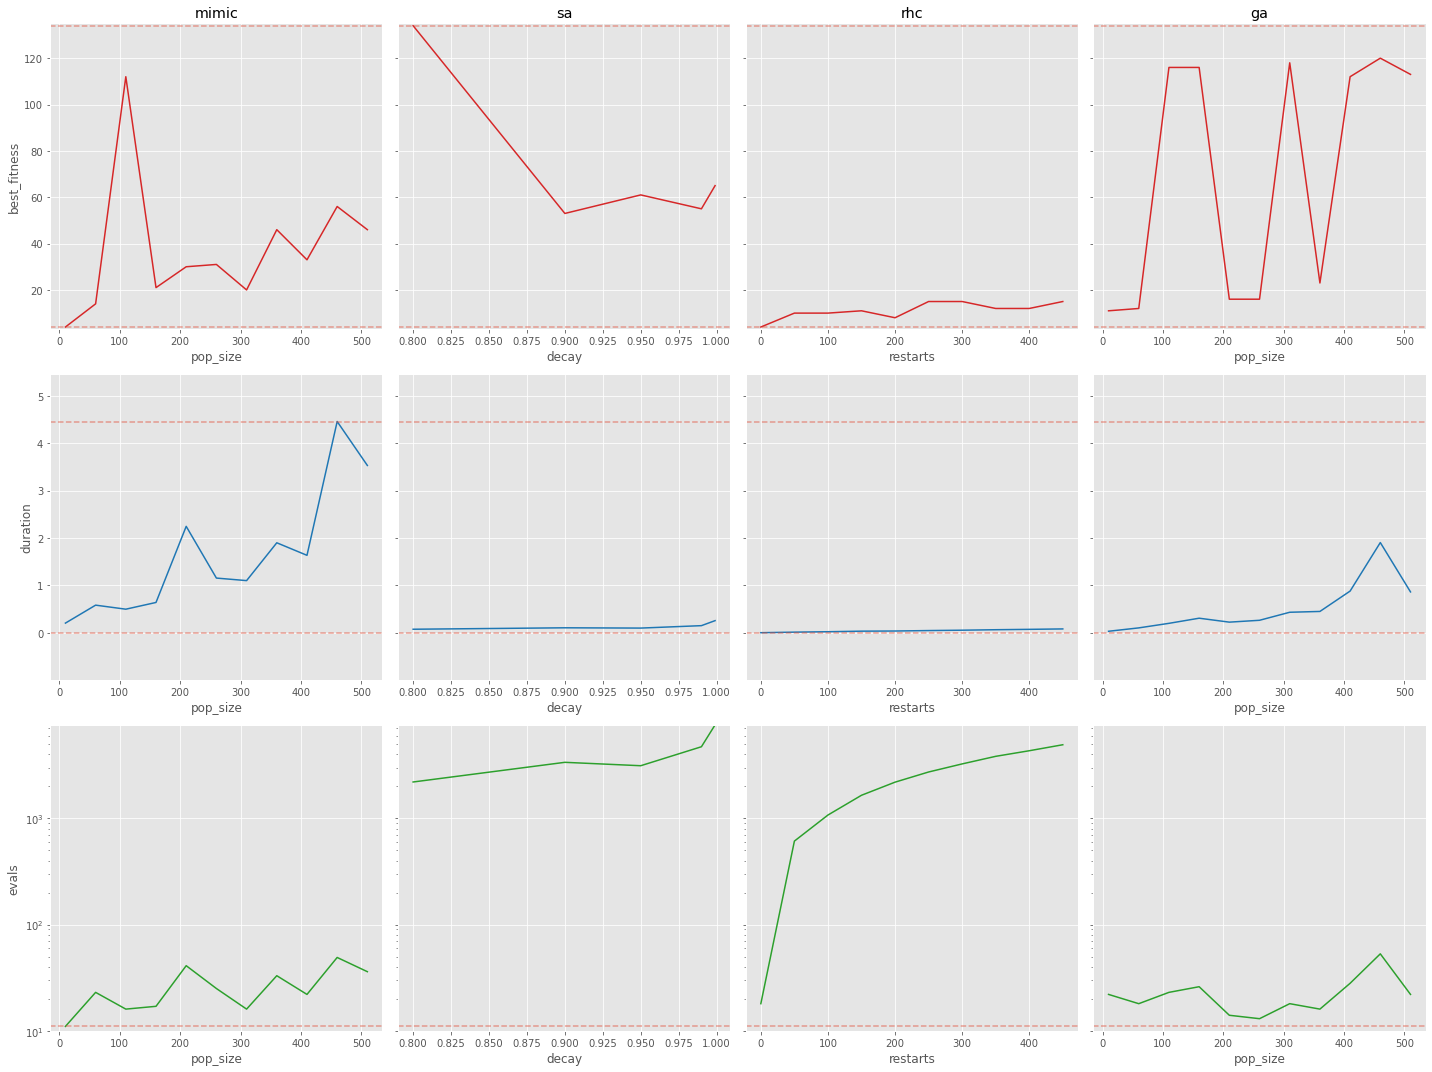

In [896]:
fig, axes, pds = ca.single_problem_plot(six_peaks100_res)

# FourPeaks

## 20

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

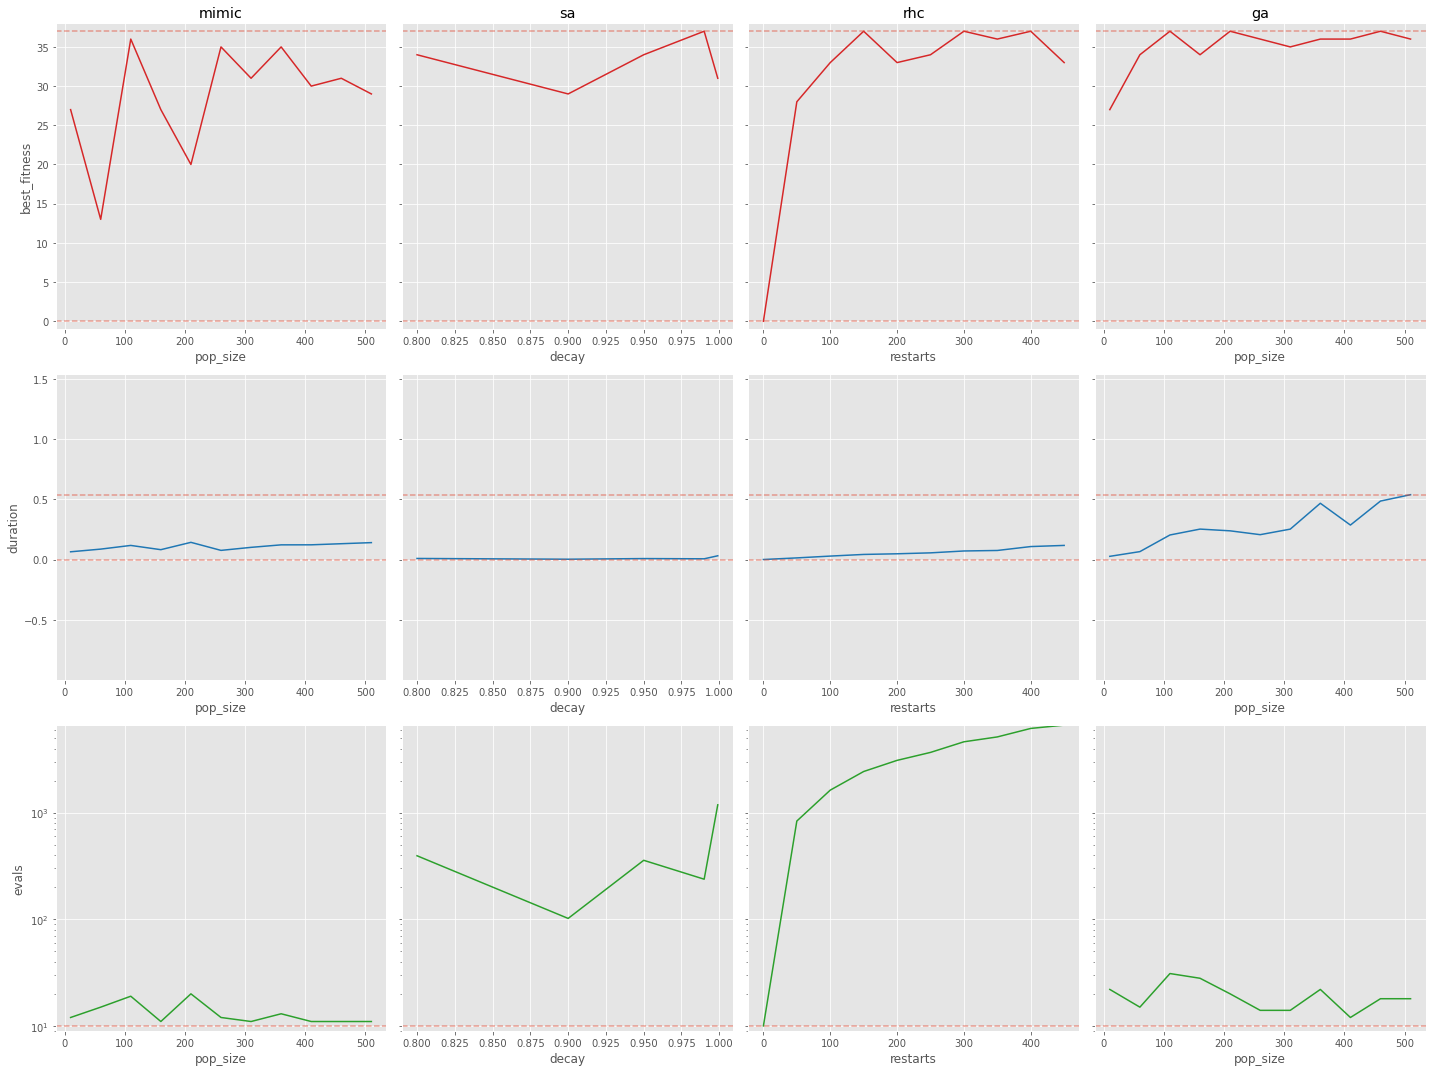

In [897]:
fitness = mlrose.FourPeaks(t_pct=0.1)

problem = mlrose.DiscreteOpt(length=20, fitness_fn=fitness, maximize=True, max_val=2)
four_peaks20_res = ca.massive_search_par(problem, candidates, par_spaces, alg_pars=base_kwargs)
fig, axes, pds = ca.single_problem_plot(four_peaks20_res)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

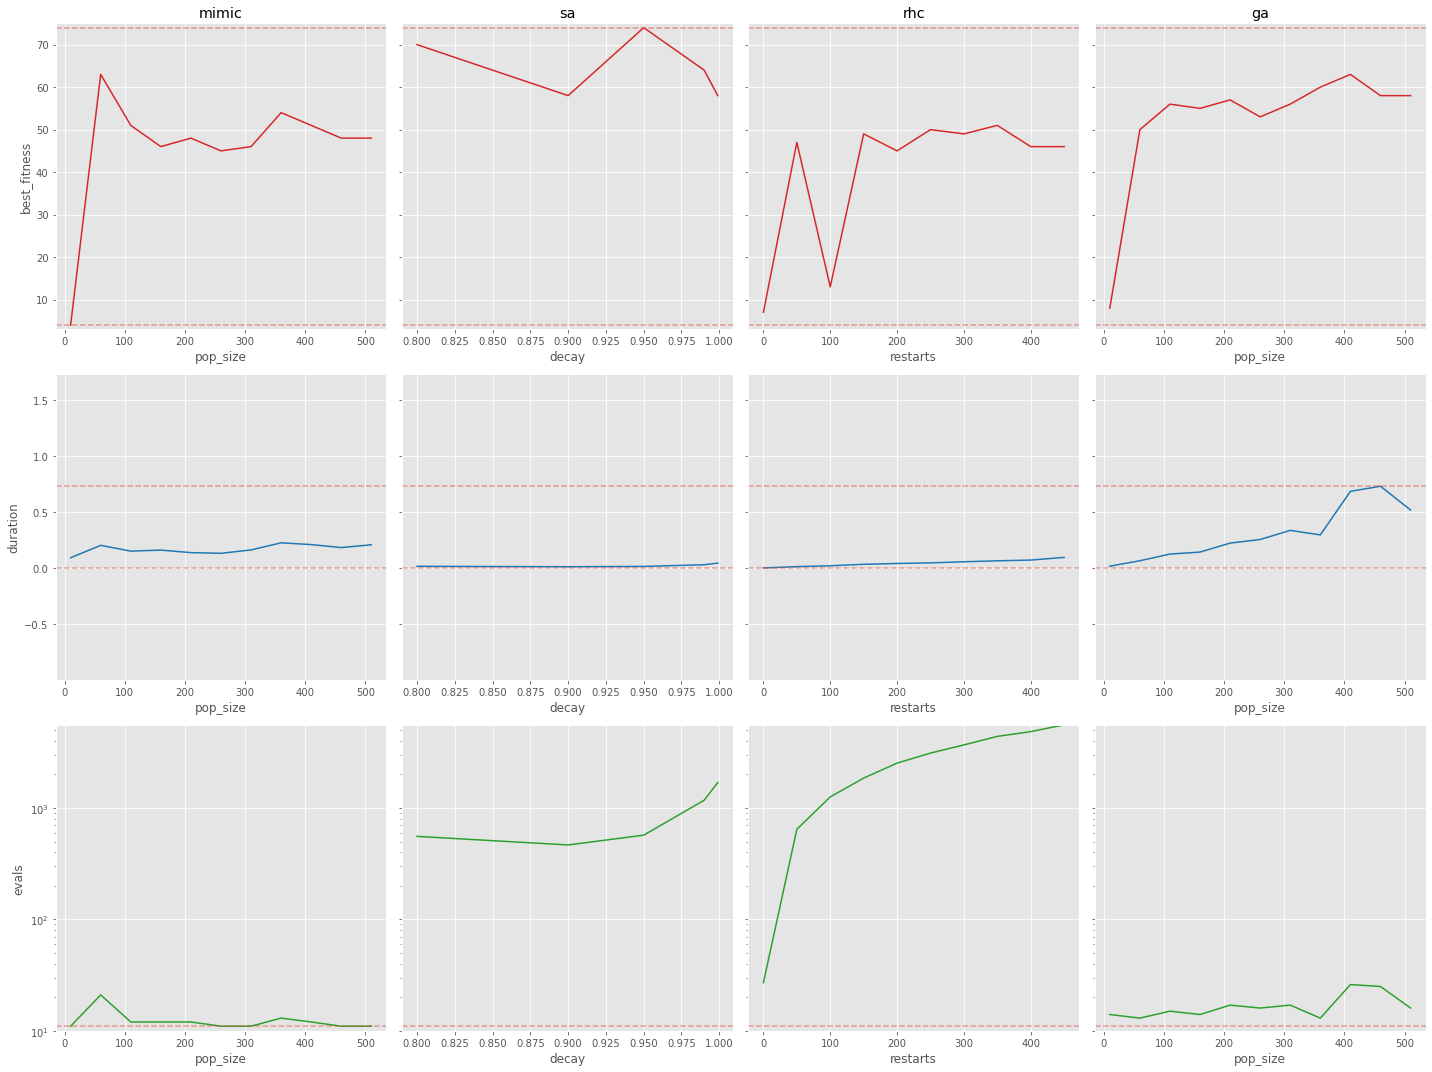

In [898]:
fitness = mlrose.FourPeaks(t_pct=0.1)

problem = mlrose.DiscreteOpt(length=40, fitness_fn=fitness, maximize=True, max_val=2)
four_peaks40_res = ca.massive_search_par(problem, candidates, par_spaces, alg_pars=base_kwargs)
fig, axes, pds = ca.single_problem_plot(four_peaks40_res)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

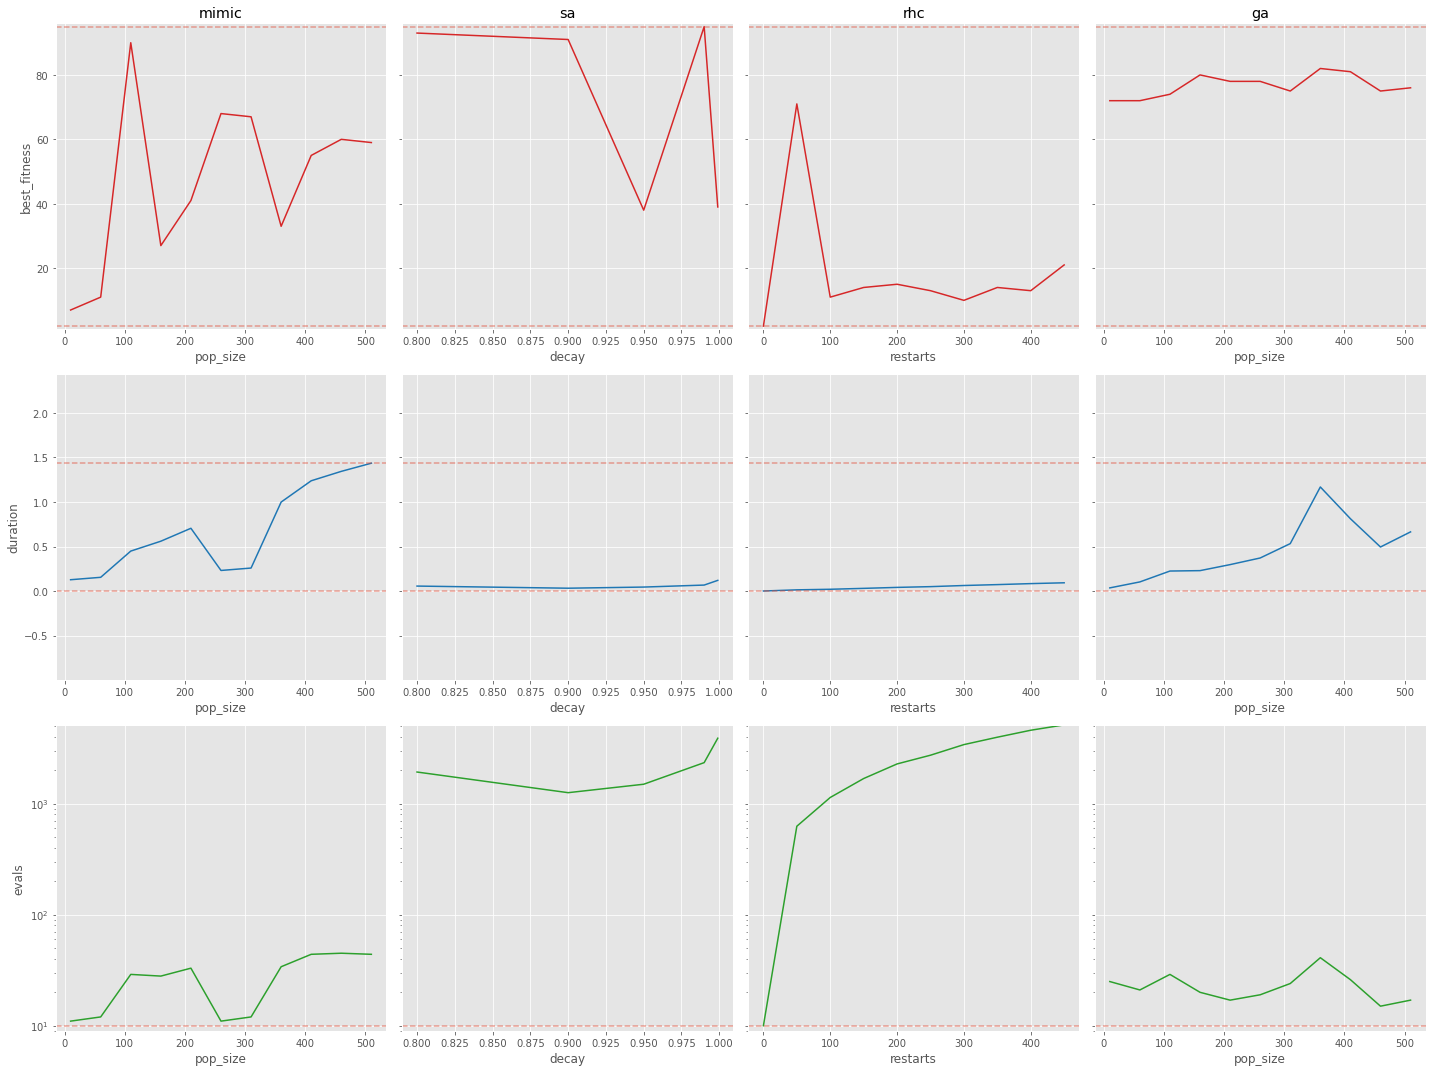

In [899]:
fitness = mlrose.FourPeaks(t_pct=0.1)

problem = mlrose.DiscreteOpt(length=60, fitness_fn=fitness, maximize=True, max_val=2)
four_peaks60_res = ca.massive_search_par(problem, candidates, par_spaces, alg_pars=base_kwargs)
fig, axes, pds = ca.single_problem_plot(four_peaks60_res)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

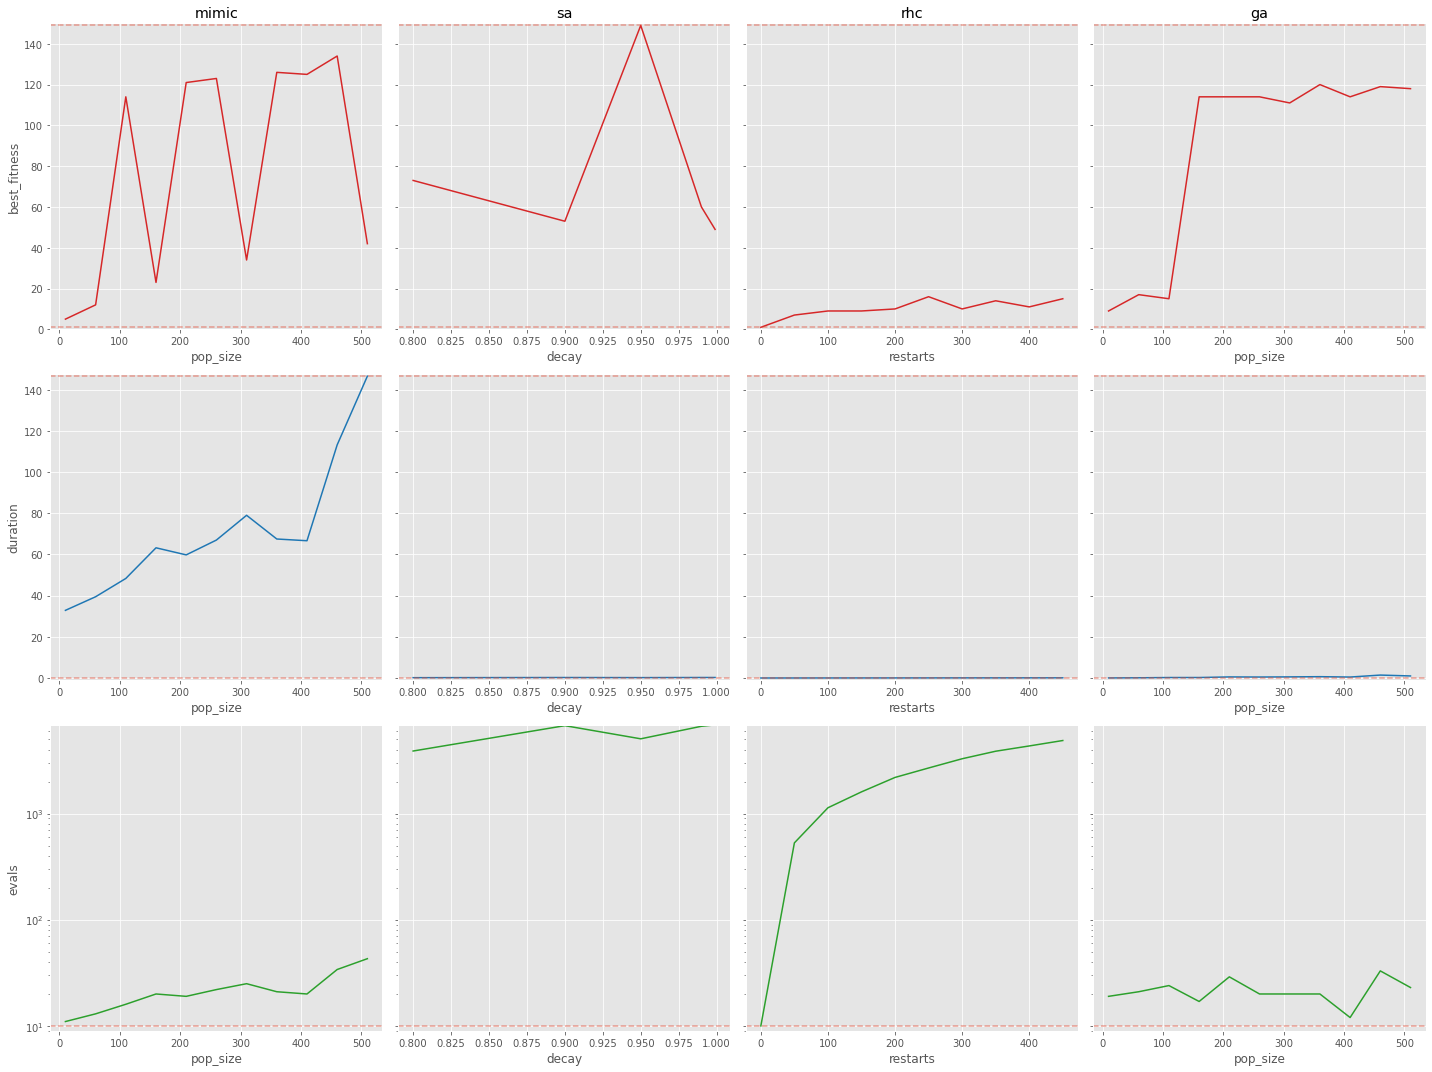

In [860]:
fitness = mlrose.FourPeaks(t_pct=0.1)

problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)
four_peaks100_res = ca.massive_search_par(problem, candidates, par_spaces)
fig, axes, pds = ca.single_problem_plot(four_peaks100_res)

# Sales person

## 10 places - RHC

In [903]:
base_kwargs['mimic']['fast_mimic'] = False

[(9, 30), (13, 18), (6, 46), (1, 32), (29, 24), (28, 33), (8, 11), (12, 16), (22, 5), (48, 42)]


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

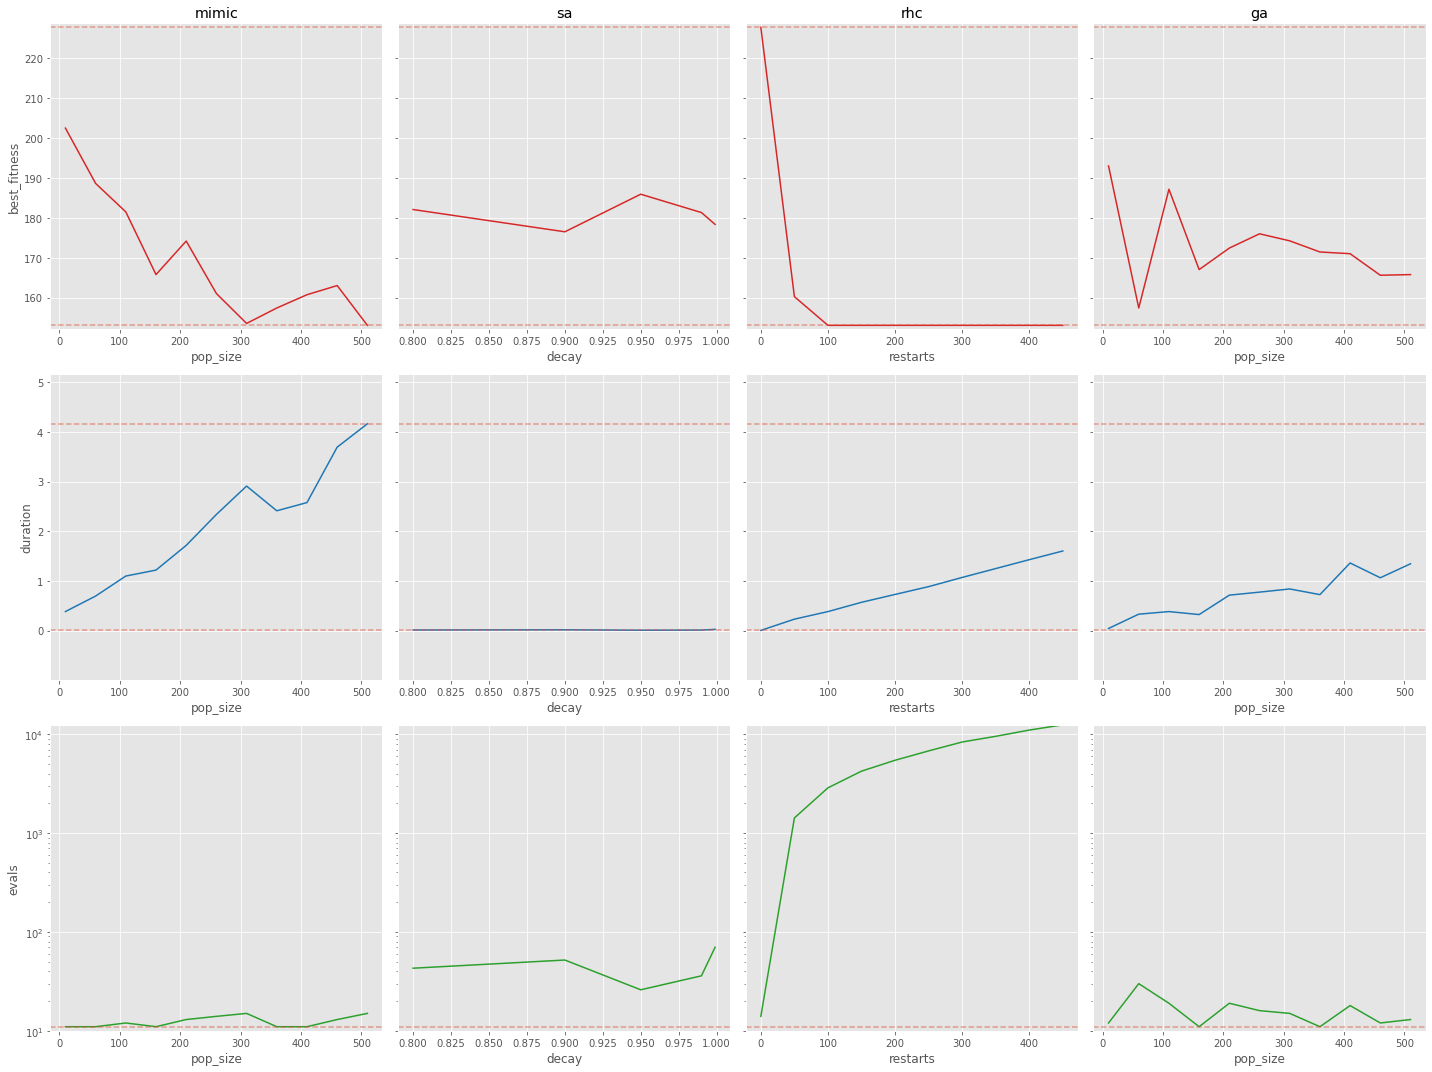

In [904]:
np.random.seed(15)
n_stops = 10
distance = 50

coords_list = list(zip(
    np.random.randint(1, distance, n_stops).tolist(),
    np.random.randint(1, distance, n_stops).tolist()
))

fitness_coords = mlrose.TravellingSales(coords=coords_list)
problem = mlrose.TSPOpt(length=n_stops, fitness_fn=fitness_coords, maximize=False)
print(coords_list)
sp10_res = ca.massive_search_par(problem, candidates, par_spaces, alg_pars=base_kwargs)
fig, axes, pds = ca.single_problem_plot(sp10_res)

In [908]:
base_kwargs['mimic']['fast_mimic'] = False

[(9, 40), (13, 38), (6, 20), (1, 45), (29, 14), (28, 30), (8, 16), (12, 39), (22, 16), (48, 2), (30, 32), (18, 33), (46, 22), (32, 27), (24, 35), (33, 12), (11, 2), (16, 41), (5, 7), (42, 42)]


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

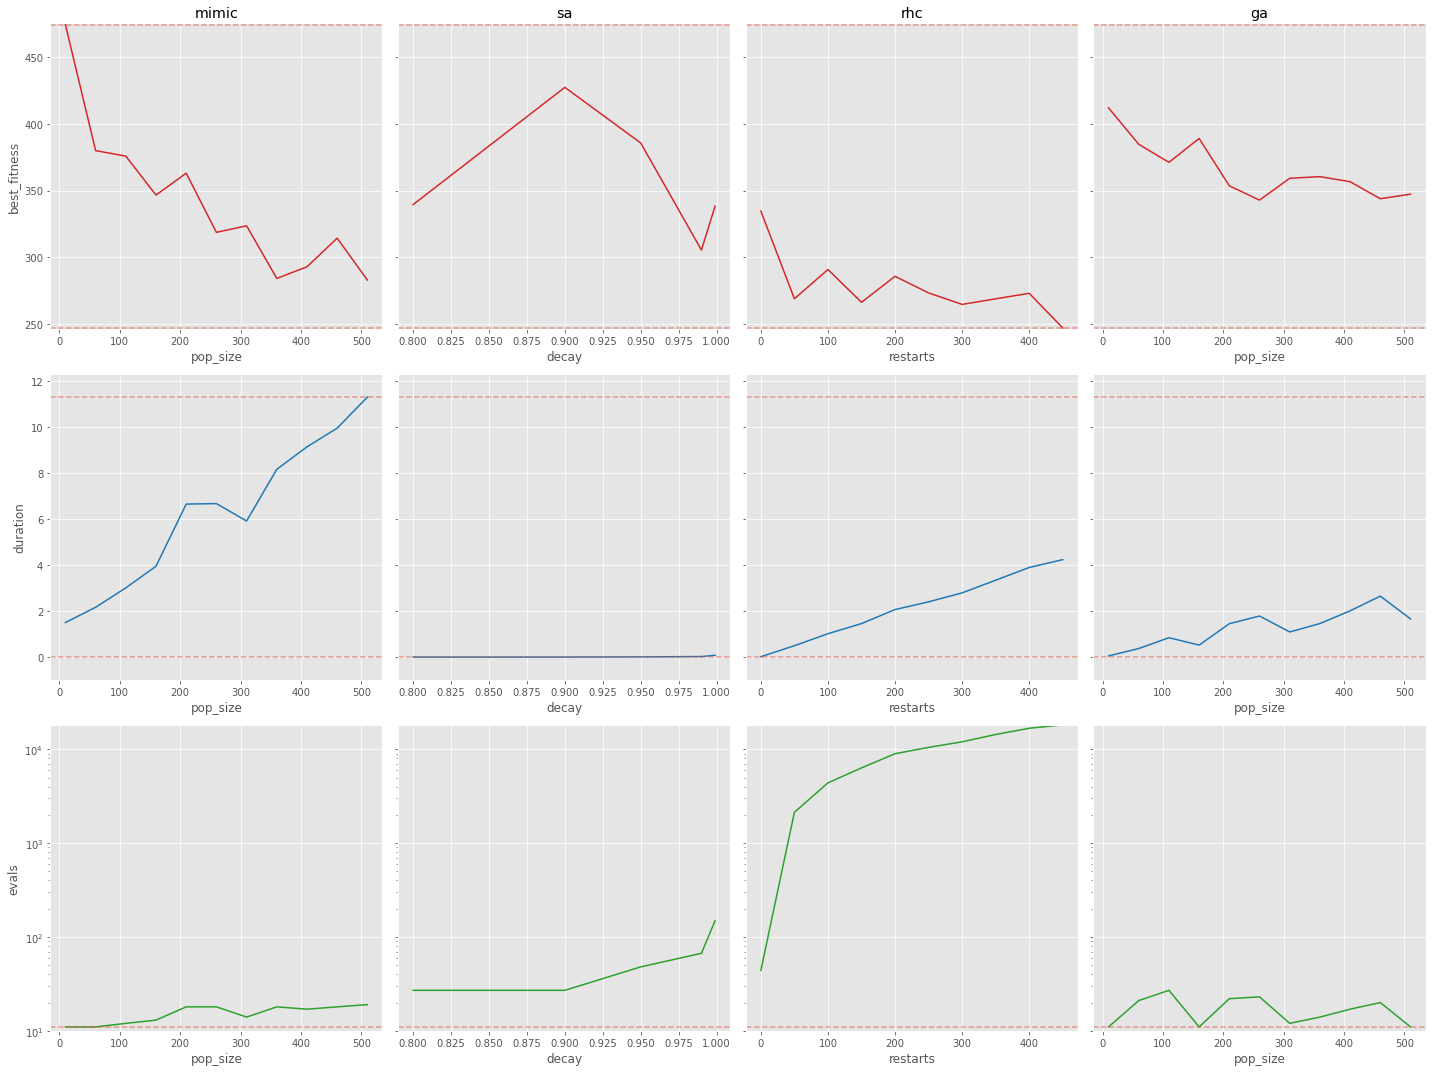

In [909]:
np.random.seed(15)
n_stops = 20
distance = 50

coords_list = list(zip(
    np.random.randint(1, distance, n_stops).tolist(),
    np.random.randint(1, distance, n_stops).tolist()
))

fitness_coords = mlrose.TravellingSales(coords=coords_list)
problem = mlrose.TSPOpt(length=n_stops, fitness_fn=fitness_coords, maximize=False)
print(coords_list)
sp20_res = ca.massive_search_par(problem, candidates, par_spaces, alg_pars=base_kwargs)
fig, axes, pds = ca.single_problem_plot(sp20_res)

[(9, 43), (13, 33), (6, 38), (1, 8), (29, 25), (28, 38), (8, 46), (12, 20), (22, 49), (48, 41), (30, 30), (18, 13), (46, 25), (32, 47), (24, 13), (33, 34), (11, 3), (16, 25), (5, 45), (42, 43), (40, 18), (38, 24), (20, 30), (45, 35), (14, 24), (30, 19), (16, 27), (39, 27), (16, 17), (2, 14), (32, 27), (33, 33), (22, 7), (27, 5), (35, 29), (12, 21), (2, 36), (41, 40), (7, 29), (42, 6), (35, 1), (41, 10), (23, 49), (41, 21), (16, 47), (29, 39), (36, 36), (5, 15), (8, 19), (3, 40)]


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

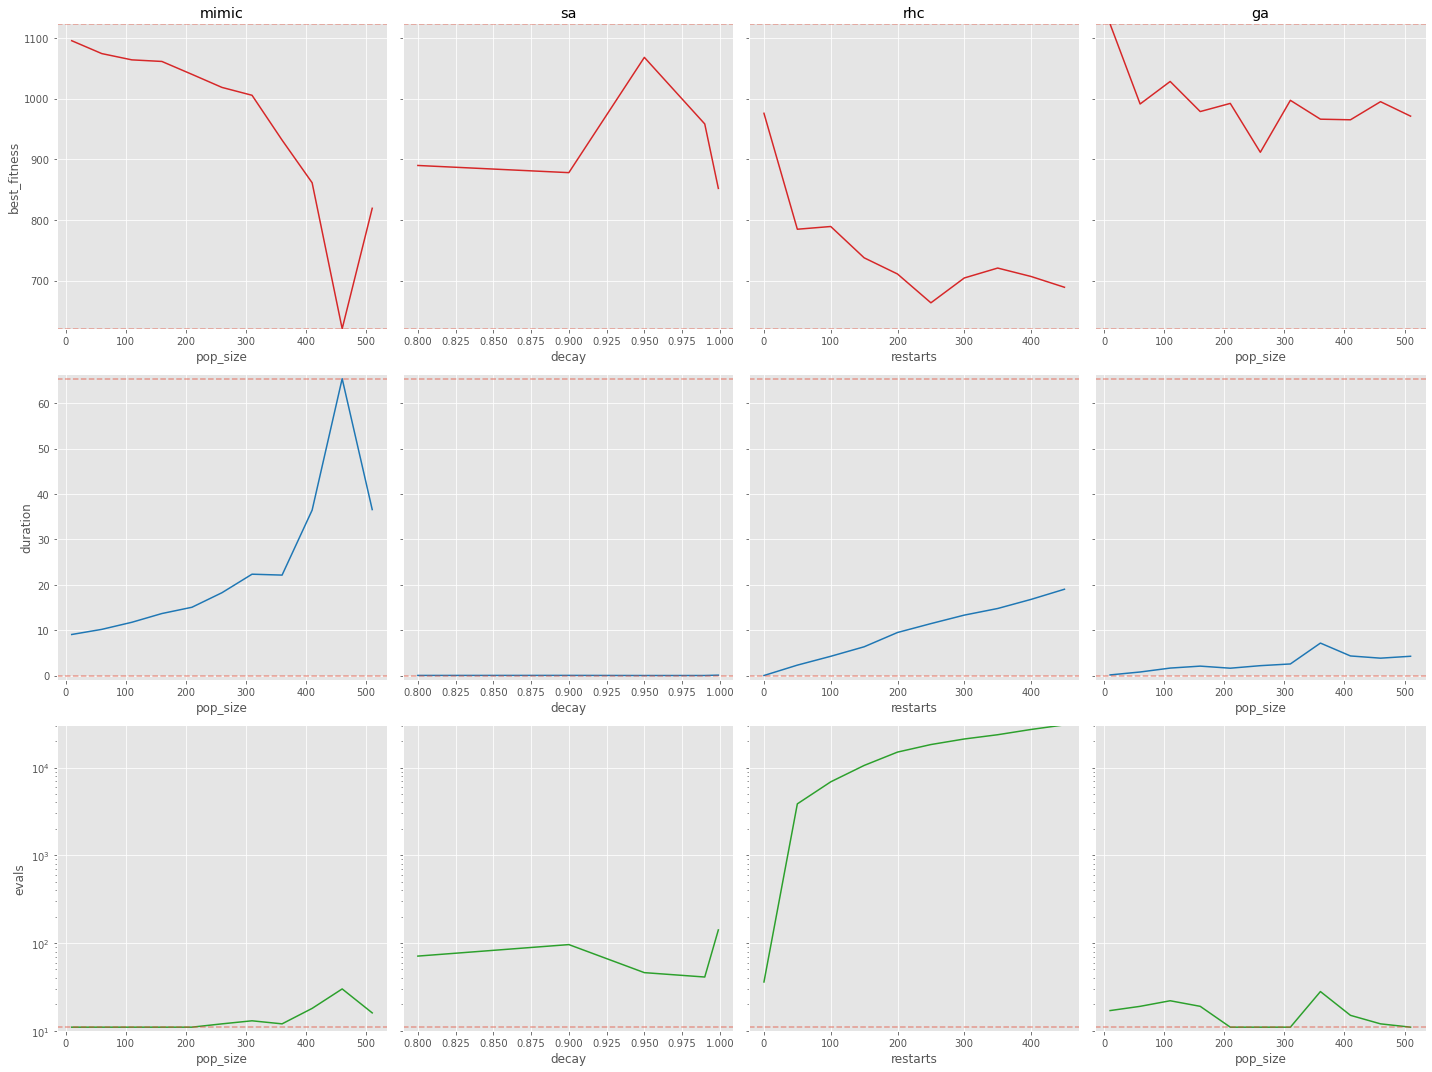

In [872]:
np.random.seed(15)
n_stops = 50
distance = 50

coords_list = list(zip(
    np.random.randint(1, distance, n_stops).tolist(),
    np.random.randint(1, distance, n_stops).tolist()
))

fitness_coords = mlrose.TravellingSales(coords=coords_list)
problem = mlrose.TSPOpt(length=n_stops, fitness_fn=fitness_coords, maximize=False)
print(coords_list)
sp50_res = ca.massive_search_par(problem, candidates, par_spaces)
fig, axes, pds = ca.single_problem_plot(sp50_res)

# Expensive Sales - MIMIC

In [910]:
np.random.seed(15)
n_stops = 20
distance = 50

coords_list = list(zip(
    np.random.randint(1, distance, n_stops).tolist(),
    np.random.randint(1, distance, n_stops).tolist()
))

fitness_coords = mlrose.TravellingSales(coords=coords_list)

In [916]:
for alg_name in base_kwargs:
    base_kwargs[alg_name]['max_iters'] = 100

In [1123]:
base_kwargs

{'mimic': {'curve': True, 'fast_mimic': True, 'pop_size': 60},
 'sa': {'curve': True, 'schedule': <mlrose.decay.GeomDecay at 0x7f8a7a128050>},
 'rhc': {'curve': True, 'restarts': 450},
 'ga': {'curve': True, 'pop_size': 510}}

In [926]:
candidates_norhc = {x[0]: x[1] for x in candidates.items() if x[0] != 'rhc'}

In [1124]:
for alg_name in base_kwargs:
    base_kwargs[alg_name]['max_iters'] = 50

In [1126]:
base_kwargs['mimic']['fast_mimic'] = False

[(9, 43), (13, 33), (6, 38), (1, 8), (29, 25), (28, 38), (8, 46), (12, 20), (22, 49), (48, 41), (30, 30), (18, 13), (46, 25), (32, 47), (24, 13), (33, 34), (11, 3), (16, 25), (5, 45), (42, 43), (40, 18), (38, 24), (20, 30), (45, 35), (14, 24), (30, 19), (16, 27), (39, 27), (16, 17), (2, 14), (32, 27), (33, 33), (22, 7), (27, 5), (35, 29), (12, 21), (2, 36), (41, 40), (7, 29), (42, 6), (35, 1), (41, 10), (23, 49), (41, 21), (16, 47), (29, 39), (36, 36), (5, 15), (8, 19), (3, 40)]


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

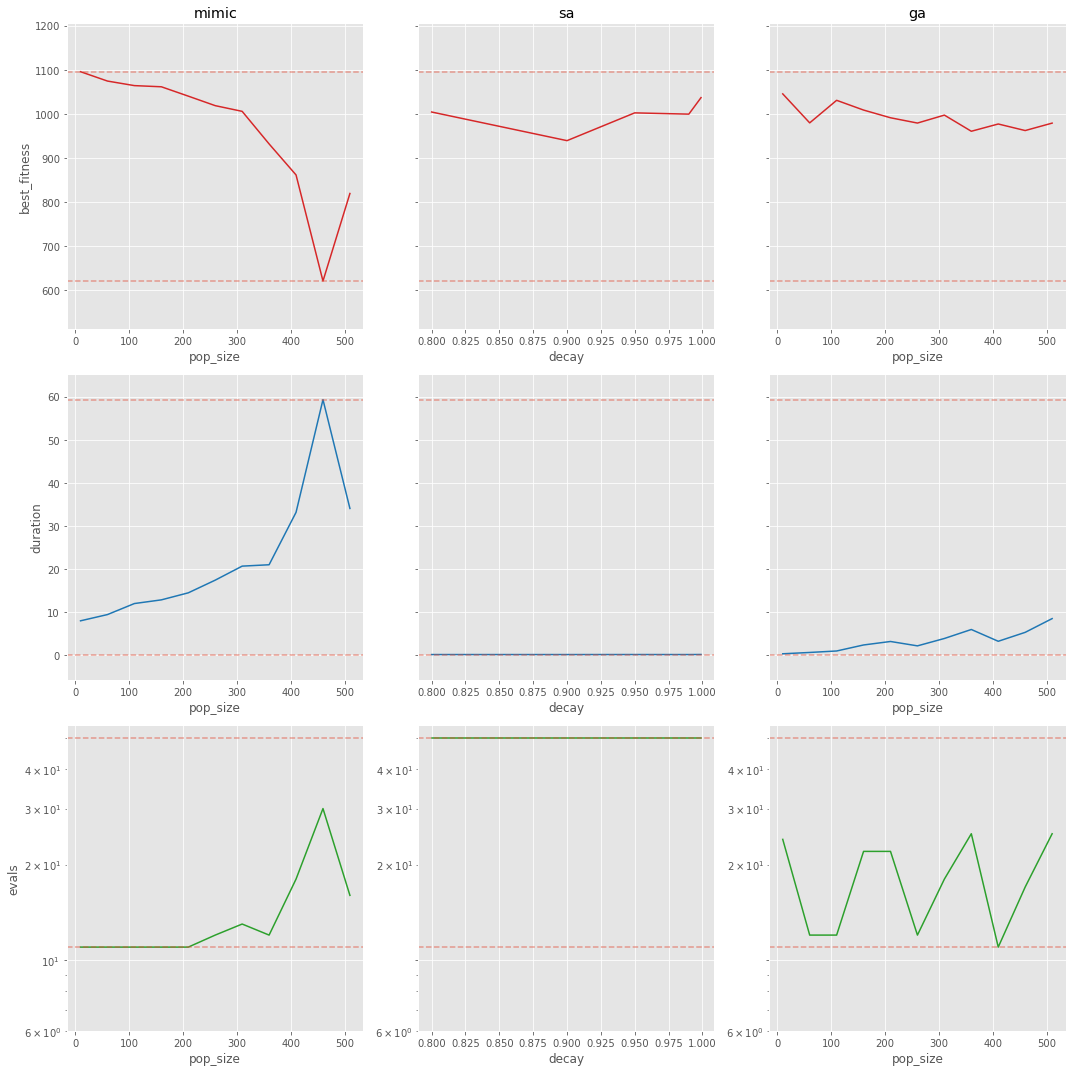

In [1127]:
np.random.seed(15)
n_stops = 50
distance = 50

coords_list = list(zip(
    np.random.randint(1, distance, n_stops).tolist(),
    np.random.randint(1, distance, n_stops).tolist()
))

fitness_coords = mlrose.TravellingSales(coords=coords_list)
problem = mlrose.TSPOpt(length=n_stops, fitness_fn=fitness_coords, maximize=False)
print(coords_list)
sp50_res = ca.massive_search_par(problem, candidates_norhc, par_spaces, alg_pars=base_kwargs)

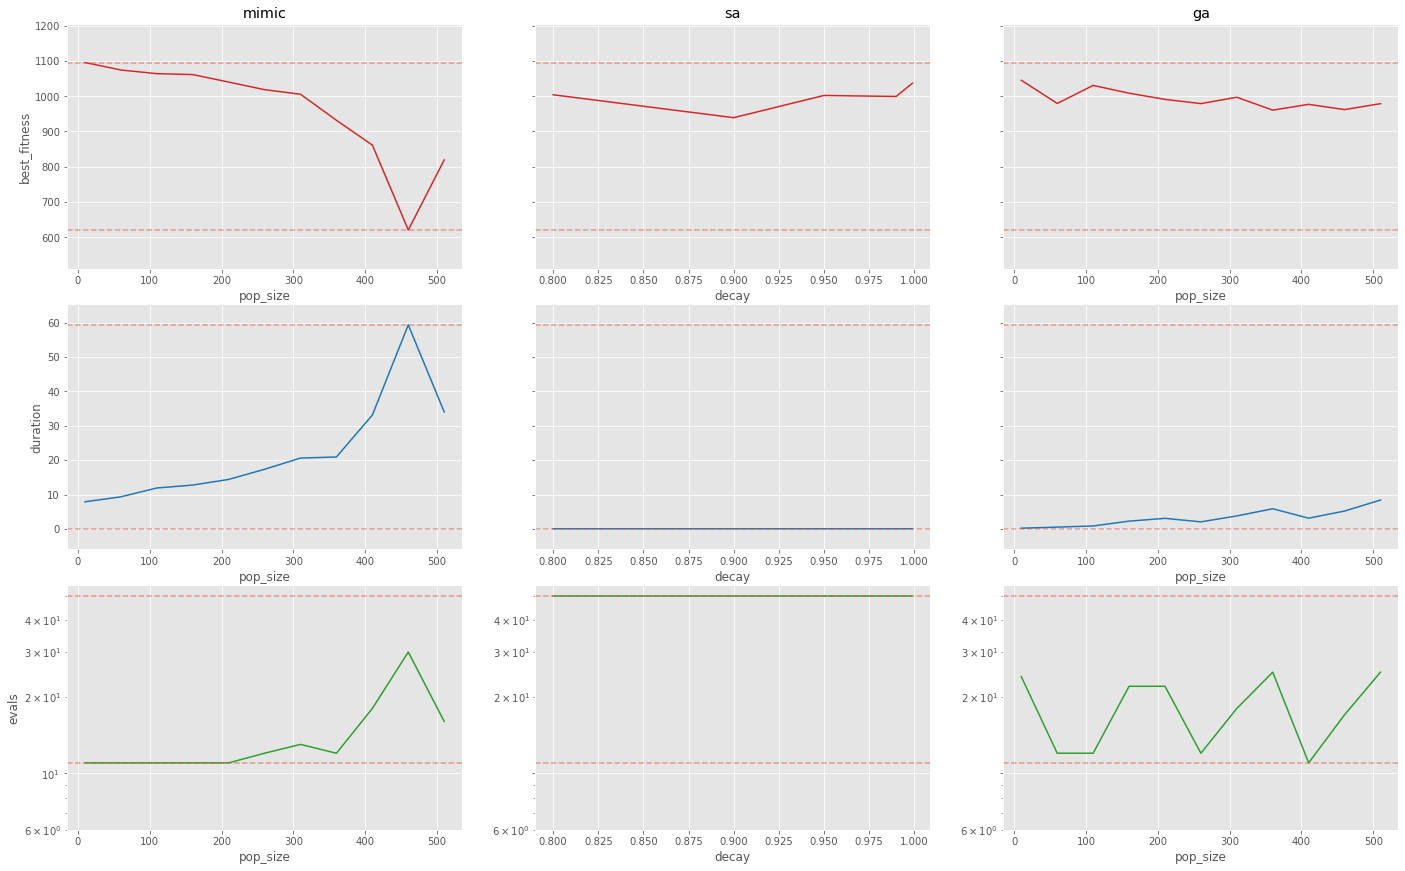

In [1133]:
# fig, axes, pds = ca.single_problem_plot(sp50_res)
fig.set_size_inches(20, 12)
fig

In [934]:
# Weights 

In [950]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import sklearn.metrics

In [941]:
df = pd.read_csv('../Project_1/data/Bike-Sharing-Dataset/hour.csv', sep=',')
train_X, test_X = train_test_split(df, train_size=0.9, random_state=13)

X, y, trained_ohes = ca.encode_input_data(
    df.rename(columns={'cnt': 'y'}).drop(columns=['dteday', 'instant', 'casual', 'registered'])
)

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.9, random_state=13)
flex_train_X, valid_X, flex_train_y, valid_y = train_test_split(train_X, train_y, train_size=0.9)

In [947]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)

In [948]:
flex_train_X2, valid_X2, flex_train_y2, valid_y2 = train_test_split(train_X_scaled, train_y, train_size=0.9)

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


10% Ammount: 1408 3.4334 seconds, train: 536.557, test: 6191.886

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


13% Ammount: 1830 3.8914 seconds, train: 781.820, test: 3569.389

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


16% Ammount: 2252 4.5176 seconds, train: 1532.582, test: 6622.889

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


19% Ammount: 2674 5.0026 seconds, train: 931.444, test: 2822.783

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


22% Ammount: 3097 5.9660 seconds, train: 997.483, test: 2521.711

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


25% Ammount: 3519 6.6594 seconds, train: 1048.318, test: 2275.462

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


28% Ammount: 3941 7.1706 seconds, train: 1139.339, test: 2762.217

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


31% Ammount: 4364 8.1165 seconds, train: 1012.129, test: 2409.078

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


34% Ammount: 4786 8.6602 seconds, train: 1163.598, test: 2132.802

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


37% Ammount: 5208 9.7769 seconds, train: 1164.655, test: 2095.624

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


40% Ammount: 5630 10.6804 seconds, train: 1336.381, test: 2105.952

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


43% Ammount: 6053 11.7154 seconds, train: 1322.656, test: 1936.092

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


46% Ammount: 6475 11.4026 seconds, train: 1380.603, test: 1981.655

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


49% Ammount: 6897 11.7409 seconds, train: 1353.318, test: 2110.367

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


52% Ammount: 7320 11.9967 seconds, train: 1338.068, test: 1829.194

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


55% Ammount: 7742 12.7424 seconds, train: 1606.633, test: 2022.927

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


58% Ammount: 8164 13.9052 seconds, train: 1410.770, test: 1899.182

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


61% Ammount: 8586 14.3452 seconds, train: 1620.096, test: 2013.634

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


64% Ammount: 9009 15.1809 seconds, train: 1403.216, test: 1926.571

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


67% Ammount: 9431 16.1739 seconds, train: 1488.242, test: 2000.563

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


70% Ammount: 9853 17.6350 seconds, train: 1455.644, test: 1857.117

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


73% Ammount: 10275 17.7511 seconds, train: 1339.511, test: 1811.899

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


76% Ammount: 10698 18.0110 seconds, train: 1413.022, test: 1904.058

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


79% Ammount: 11120 19.4709 seconds, train: 1487.932, test: 1827.020

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


82% Ammount: 11542 20.4318 seconds, train: 1551.780, test: 1792.212

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


85% Ammount: 11965 20.8126 seconds, train: 1408.738, test: 1760.490

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


88% Ammount: 12387 21.0267 seconds, train: 1450.976, test: 1741.500

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


91% Ammount: 12809 21.8644 seconds, train: 1495.603, test: 1835.984

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


94% Ammount: 13231 22.1404 seconds, train: 1521.117, test: 1868.574

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


97% Ammount: 13654 23.5715 seconds, train: 1546.118, test: 1789.880

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100% Ammount: 14076 23.8915 seconds, train: 1445.385, test: 1750.832

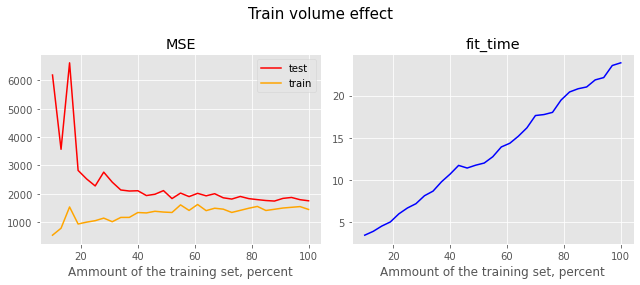

In [951]:
pars = {
     'random_state': 13,
     'activation': 'relu',
     'hidden_layer_sizes': [15 for x in range(9)],
     'alpha': 0.1778279410038923, 
     'solver': 'lbfgs', 
     'max_iter': 1000, 
     'learning_rate_init': 1e-5,
}

fig, axes = ca.build_lc(
    estimator=MLPRegressor,
    pars=pars,
    train=flex_train_X2, train_y=flex_train_y2,
    valid=valid_X2, valid_y=valid_y2,
    metric_f=sklearn.metrics.mean_squared_error, metric_f_name='MSE'
)

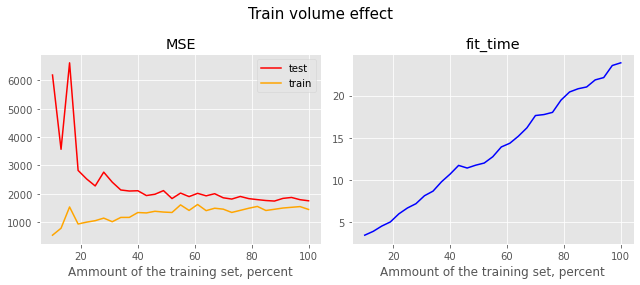

In [954]:
fig

In [987]:
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [15 for x in range(9)], activation = 'relu',
                                 algorithm = 'random_hill_climb', max_iters = 1000,
                                 bias = True, is_classifier = False, learning_rate = 1e-5,
                                 early_stopping = False, clip_max = 5, max_attempts = 100, \
                                 random_state = 13, curve=True)

nn_model1.fit(flex_train_X2, flex_train_y2)

NeuralNetwork(clip_max=5, hidden_nodes=[15, 15, 15, 15, 15, 15, 15, 15, 15],
              is_classifier=False, learning_rate=1e-05, max_iters=1000)

In [988]:
valid_preds = nn_model1.predict(valid_X2)

In [989]:
sklearn.metrics.mean_squared_error(valid_y2, valid_preds)

66547.97159947586

In [994]:
nn_model1.fitness_curve

array([-64988.87464669, -64988.87464669, -64988.87464669, -64988.87464669,
       -64988.87464602, -64988.87342564, -64988.87342564, -64988.87253279,
       -64988.87253279, -64988.86180714, -64988.86180714, -64988.86180714,
       -64988.8395378 , -64988.8395378 , -64988.8395378 , -64988.8395378 ,
       -64988.8395378 , -64988.8395378 , -64988.8395378 , -64988.83953531,
       -64988.83953531, -64988.80657823, -64988.80657823, -64988.80645525,
       -64988.80645525, -64988.80645525, -64988.74895004, -64988.74779038,
       -64988.74779038, -64988.74779038, -64988.74779038, -64988.74681463,
       -64988.74351351, -64988.74351351, -64988.74351351, -64988.74351351,
       -64988.74351351, -64988.72887563, -64988.72887563, -64988.72887563,
       -64988.72887563, -64988.72877557, -64988.72877557, -64988.72613353,
       -64988.72613353, -64988.72613353, -64988.72613353, -64988.71267629,
       -64988.71266947, -64988.71266947, -64988.70928983, -64988.70928983,
       -64988.70928983, -

# Weight optimization

In [ ]:
# RHC

In [961]:
new_pars = dict(
    hidden_nodes = [15 for x in range(9)], activation = 'relu',
    algorithm = 'random_hill_climb', max_iters = 1000,
    bias = True, is_classifier = False, learning_rate = 1e-5,
    early_stopping = False, clip_max = 5, max_attempts = 100,
    random_state = 13
)

100% Ammount: 14076 35.1144 seconds, train: 64986.428, test: 66547.972

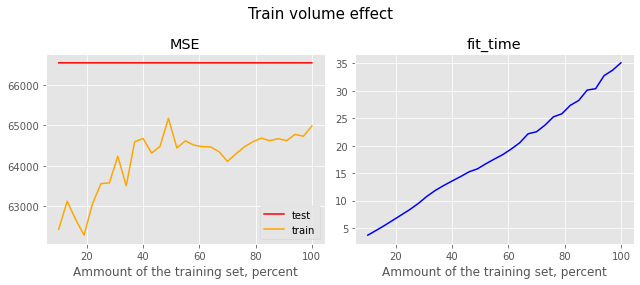

In [964]:
fig2, axes2 = ca.build_lc(
    estimator=mlrose.NeuralNetwork,
    pars=new_pars,
    train=flex_train_X2, train_y=flex_train_y2,
    valid=valid_X2, valid_y=valid_y2,
    metric_f=sklearn.metrics.mean_squared_error, metric_f_name='MSE'
)

In [ ]:
# 60 data

In [978]:
X60 = X[:int(X.shape[0]*0.6), :]
y60 = y[:int(X.shape[0]*0.6)]

In [979]:
X60.shape, y60.shape

((10427, 12), (10427,))

In [995]:
target_metrics = {
    'MSE': sklearn.metrics.mean_squared_error,
    'Explained_variance': sklearn.metrics.explained_variance_score
}

In [1050]:
sa_spaces = {
    "simulated_annealing": {"par_name": "schedule",
           "range": [mlrose.GeomDecay(init_temp=10, decay=x, min_temp=1)
           for x in [0.999, 0.99, 0.95, 0.90, 0.8]]}}
rhc_space = {
    "random_hill_climb": {"par_name": "restarts",
            "range": np.arange(0, 200, 50).tolist()}}
ga_space = {
    "genetic_alg": {"par_name": "pop_size",
           "range": np.arange(10, 200, 30).tolist()},
}

In [ ]:
"genetic_alg": {"par_name": "pop_size",
           "range": np.arange(10, 520, 50).tolist()},

In [1155]:
pd.DataFrame(w_res_fast['simulated_annealing']['range']).T['fitness_curve'].apply(len)

<mlrose.decay.GeomDecay object at 0x7f8a527fdf10>    2000
<mlrose.decay.GeomDecay object at 0x7f8a527fd610>    2000
<mlrose.decay.GeomDecay object at 0x7f8a527fdd90>    2000
<mlrose.decay.GeomDecay object at 0x7f8a527fd3d0>    2000
<mlrose.decay.GeomDecay object at 0x7f8a527fd210>    2000
Name: fitness_curve, dtype: int64

In [ ]:
%time
w_res_fast = ca.optimization_test(par_spaces=sa_spaces, X=X60, y=y60, valid_X=valid_X, valid_y=valid_y,
                  target_metrics=target_metrics)

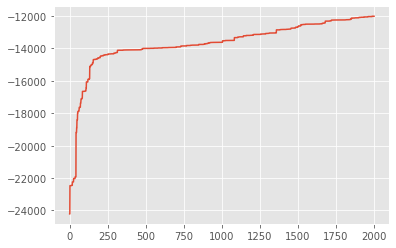

In [1162]:
plt.plot(list(w_res_fast['simulated_annealing']['range'].values())[3]['fitness_curve'])

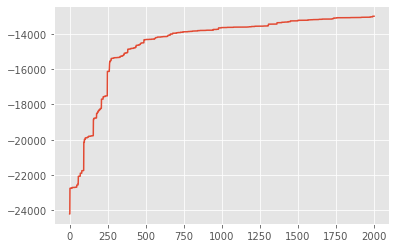

In [1163]:
plt.plot(list(w_res['simulated_annealing']['range'].values())[3]['fitness_curve'])

In [1143]:
%time
w_res = ca.optimization_test(par_spaces=sa_spaces, X=X60, y=y60, valid_X=valid_X, valid_y=valid_y,
                  target_metrics=target_metrics)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs


  0%|          | 0/1 [00:00<?, ?it/s]

simulated_annealing


  0%|          | 0/5 [00:00<?, ?it/s]

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/mlrose/a

In [1145]:
rhc_res = ca.optimization_test(par_spaces=rhc_space, X=X60, y=y60, valid_X=valid_X, valid_y=valid_y,
                  target_metrics=target_metrics)

  0%|          | 0/1 [00:00<?, ?it/s]

random_hill_climb


  0%|          | 0/4 [00:00<?, ?it/s]

In [1147]:
rhc_res

{'random_hill_climb': {'par_name': 'restarts',
  'range': {0: {'preds': array([[215.01986581],
           [285.00964936],
           [195.04060902],
           ...,
           [  3.42707893],
           [ 30.23882887],
           [213.17024981]]),
    'fitness_curve': array([-24212.34160077, -24212.34160077, -24212.34160077, ...,
           -13386.3193712 , -13386.3193712 , -13386.3193712 ]),
    'weights': array([ 0.5       , -0.52491756,  0.64855707, ...,  0.31183021,
            0.88567532,  0.62011584]),
    'duration': 35.947643995285034,
    'MSE': 27498.07649733887,
    'Explained_variance': 0.26235513295031143},
   50: {'preds': array([[224.31600094],
           [256.02078519],
           [198.21278511],
           ...,
           [ 10.4029025 ],
           [ 21.23596215],
           [223.8850955 ]]),
    'fitness_curve': array([-24212.34248876, -24212.34248876, -24212.34248876, ...,
           -13461.32881963, -13461.32881963, -13461.32881963]),
    'weights': array([ 0.455404

In [ ]:
ga_res = ca.optimization_test(par_spaces=ga_space, X=X60, y=y60, valid_X=valid_X, valid_y=valid_y,
                  target_metrics=target_metrics)

  0%|          | 0/1 [00:00<?, ?it/s]

genetic_alg


  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
ga_res['genetic_alg']['range'][10]

In [1056]:
wu_res = {}
# wu_res.update(ga_res)
wu_res.update(rhc_res)
wu_res.update(w_res)

In [1061]:
pd.DataFrame(wu_res['genetic_alg']['range']).T

,preds,fitness_curve,duration,MSE,Explained_variance
10,"[[4.910870374132933], [4.146883364136265], [5....","[0.19499292759896425, 0.09818002262560499, -0....",147.537594,71765.119523,0.00882
40,"[[8.675619709012919], [9.80073655170186], [8.5...","[0.18274981442461302, -0.267939128901976, 0.30...",551.623142,70534.51282,0.011024
70,"[[7.548020362822033], [12.039669561486308], [7...","[0.1394185534019402, 0.3854916445370491, 0.388...",955.520732,70318.109167,0.012178
100,"[[10.176407993839364], [11.22420925265697], [1...","[0.1087314849626081, -0.37734192315048987, 0.3...",1360.200462,70039.251034,0.012373
130,"[[8.632538998678163], [10.638394049675624], [8...","[-0.062335856552072744, 0.33662120923228933, -...",1765.55989,70518.895732,0.011821
160,"[[11.595918091139982], [13.49833950318339], [1...","[-0.2580867632061671, -0.36128639655965333, 0....",2170.990635,69293.963869,0.01605
190,"[[6.603627326221021], [13.327191674979854], [7...","[0.22546742098759887, 0.43685301911994656, -0....",2575.524032,70135.5917,0.015562


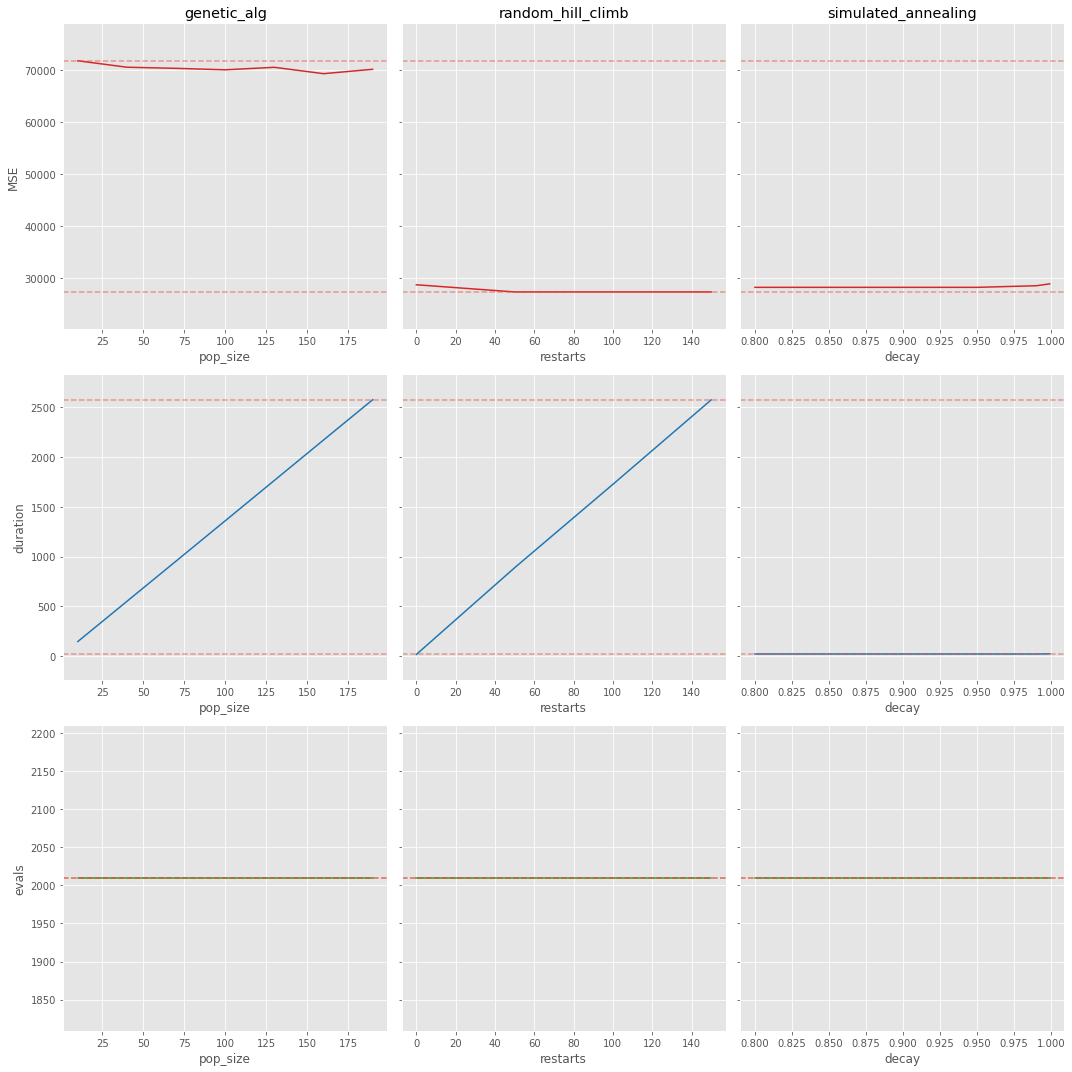

In [1117]:
ca.plot_wo_results(wu_res);

In [1099]:
_test['genetic_alg']

,preds,fitness_curve,duration,MSE,Explained_variance,evals
pop_size,,,,,,
10,"[[4.910870374132933], [4.146883364136265], [5....","[0.19499292759896425, 0.09818002262560499, -0....",147.537594,71765.119523,0.00882,2010
40,"[[8.675619709012919], [9.80073655170186], [8.5...","[0.18274981442461302, -0.267939128901976, 0.30...",551.623142,70534.51282,0.011024,2010
70,"[[7.548020362822033], [12.039669561486308], [7...","[0.1394185534019402, 0.3854916445370491, 0.388...",955.520732,70318.109167,0.012178,2010
100,"[[10.176407993839364], [11.22420925265697], [1...","[0.1087314849626081, -0.37734192315048987, 0.3...",1360.200462,70039.251034,0.012373,2010
130,"[[8.632538998678163], [10.638394049675624], [8...","[-0.062335856552072744, 0.33662120923228933, -...",1765.55989,70518.895732,0.011821,2010
160,"[[11.595918091139982], [13.49833950318339], [1...","[-0.2580867632061671, -0.36128639655965333, 0....",2170.990635,69293.963869,0.01605,2010
190,"[[6.603627326221021], [13.327191674979854], [7...","[0.22546742098759887, 0.43685301911994656, -0....",2575.524032,70135.5917,0.015562,2010


In [1101]:
_test['simulated_annealing']

,index,preds,fitness_curve,duration,MSE,Explained_variance,evals
decay,,,,,,,
0.999,<mlrose.decay.GeomDecay object at 0x7f8a527fdf10>,"[[217.37975092130802], [225.8121208446553], [2...","[0.5, -0.42491755993017544, 0.648557065322737,...",24.047522,28963.251115,0.218504,2010
0.990,<mlrose.decay.GeomDecay object at 0x7f8a527fd610>,"[[208.39857420862998], [261.24713266356684], [...","[0.5, -0.5249175599301754, 0.648557065322737, ...",22.340941,28601.070866,0.232519,2010
0.950,<mlrose.decay.GeomDecay object at 0x7f8a527fdd90>,"[[215.9431949567896], [266.67647516965326], [1...","[0.5, -0.42491755993017544, 0.648557065322737,...",22.737689,28295.610995,0.245455,2010
0.900,<mlrose.decay.GeomDecay object at 0x7f8a527fd3d0>,"[[215.9431949567896], [266.67647516965326], [1...","[0.5, -0.42491755993017544, 0.648557065322737,...",22.74273,28295.610995,0.245455,2010
0.800,<mlrose.decay.GeomDecay object at 0x7f8a527fd210>,"[[215.9431949567896], [266.67647516965326], [1...","[0.5, -0.42491755993017544, 0.648557065322737,...",22.923829,28295.610995,0.245455,2010


In [1114]:
_test['random_hill_climb']

,preds,fitness_curve,duration,MSE,Explained_variance,evals
restarts,,,,,,
0,"[[196.88042648912034], [295.7924253410954], [1...","[0.5554048211476403, -0.5249175599301754, 0.64...",18.240525,28789.238791,0.234213,2010
50,"[[227.11021146452765], [277.0869757435012], [2...","[0.5554048211476403, -0.5249175599301754, 0.64...",888.915499,27413.165597,0.263327,2010
100,"[[227.11021146452765], [277.0869757435012], [2...","[0.5554048211476403, -0.5249175599301754, 0.64...",1726.508023,27413.165597,0.263327,2010
150,"[[227.11021146452765], [277.0869757435012], [2...","[0.5554048211476403, -0.5249175599301754, 0.64...",2574.408074,27413.165597,0.263327,2010


In [1148]:
wu_res = {}
# wu_res.update(ga_res)
wu_res.update(rhc_res)
wu_res.update(w_res)

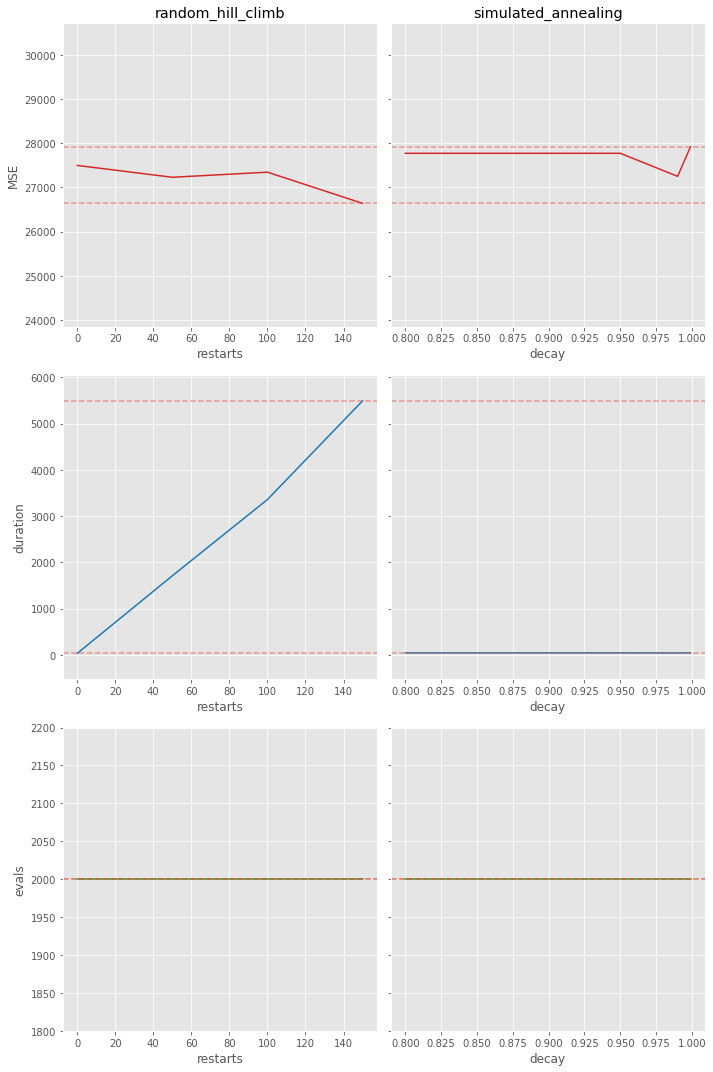

In [1149]:
ca.plot_wo_results(wu_res);

In [1103]:
_test.keys()

dict_keys(['genetic_alg', 'random_hill_climb', 'simulated_annealing'])

In [1085]:
_test["MSE"]

pop_size
10     71765.119523
40      70534.51282
70     70318.109167
100    70039.251034
130    70518.895732
160    69293.963869
190      70135.5917
Name: MSE, dtype: object

In [1077]:
for met in ['MSE', 'duration', 'evals']:
    for name, df in _test.items():
        print(name)
        display(df[met])

genetic_alg


pop_size
10     71765.119523
40      70534.51282
70     70318.109167
100    70039.251034
130    70518.895732
160    69293.963869
190      70135.5917
Name: MSE, dtype: object

random_hill_climb


restarts
0      28789.238791
50     27413.165597
100    27413.165597
150    27413.165597
Name: MSE, dtype: object

simulated_annealing


decay
0.999    28963.251115
0.990    28601.070866
0.950    28295.610995
0.900    28295.610995
0.800    28295.610995
Name: MSE, dtype: object

genetic_alg


pop_size
10      147.537594
40      551.623142
70      955.520732
100    1360.200462
130     1765.55989
160    2170.990635
190    2575.524032
Name: duration, dtype: object

random_hill_climb


restarts
0        18.240525
50      888.915499
100    1726.508023
150    2574.408074
Name: duration, dtype: object

simulated_annealing


decay
0.999    24.047522
0.990    22.340941
0.950    22.737689
0.900     22.74273
0.800    22.923829
Name: duration, dtype: object

genetic_alg


pop_size
10     2010
40     2010
70     2010
100    2010
130    2010
160    2010
190    2010
Name: evals, dtype: int64

random_hill_climb


restarts
0      2010
50     2010
100    2010
150    2010
Name: evals, dtype: int64

simulated_annealing


decay
0.999    2010
0.990    2010
0.950    2010
0.900    2010
0.800    2010
Name: evals, dtype: int64